# Homework 5

### AISHWARYA GIRDHAR

Aishwarya.Girdhar@student.uibk.ac.at

Aish0107

30.10.2018.

### ASTROINFORMATICS

https://github.com/astromundus/astroinfo2018/homeworks/HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

## Solution

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results

from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#### Loading the Data 

In [2]:
# Loading the dataset from astroML.datasets
data = fetch_LINEAR_sample()
#This saves two files in the astroML_data folder in home. 

#### Defining Functions 

In [21]:
#Using a pickle file for the following fucntion to save time for long runs and multiple iterations.
#@pickle_results('Ash_LINEAR_6objetcs.pkl', verbose = 'True')
#@pickle_results('Ash_LINEAR_100objects.pkl', verbose = 'True')
#@pickle_results('Ash_LINEAR_allobjects.pkl', verbose = 'True')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    #---------------------------------------------------------------------
    #Generates the periodogram by the lombscargle method.
    results = {}        #empty dictionary
    omega_best = np.zeros(len(ids))
    for i in range(len(ids)):
        
        t, y, dy = data[ids[i]].T
        print(" * Computing power for %i (%i points)" % (ids[i], len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[ids[i]] = [omega, power]
        #results is a dictionary; where key is the objectID and values are [omega,power]
        omega_best[i] = omega[np.argmax(power)]  #omega_best is where power is max.
        print (" >> For object: %i; Omega_best = %.10g" % (ids[i], omega_best[i]))
        print ("Iteration No: ", i+1)
        print (" ")
    return (results, omega_best)


def plot_lightcurves(results, ids):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(5, 6.5))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)
    omega_best = np.zeros(len(ids))
    for i in range(len(ids)):
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best[i] = omega[np.argmax(power)]  #omega_best is where power is max.

        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best[i], 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        ax.errorbar(phased_t, y, dy, fmt='.k', alpha = 0.7, ecolor='yellow',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=3)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best[i] * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig 

####  Calculating Periods and plotting periodograms for random 6 stars

@pickle_results: computing results and saving to 'Ash_LINEAR_6objetcs.pkl'
 * Computing power for 14752041 (253 points)
 >> For object: 14752041; Omega_best = 17.21695506
Iteration No:  1
 
 * Computing power for 1009459 (593 points)
 >> For object: 1009459; Omega_best = 51.10600808
Iteration No:  2
 
 * Computing power for 10022663 (246 points)
 >> For object: 10022663; Omega_best = 10.20062676
Iteration No:  3
 
 * Computing power for 10025796 (233 points)
 >> For object: 10025796; Omega_best = 45.55493503
Iteration No:  4
 
 * Computing power for 11375941 (280 points)
 >> For object: 11375941; Omega_best = 58.44512277
Iteration No:  5
 
 * Computing power for 18525697 (211 points)
 >> For object: 18525697; Omega_best = 10.82722772
Iteration No:  6
 


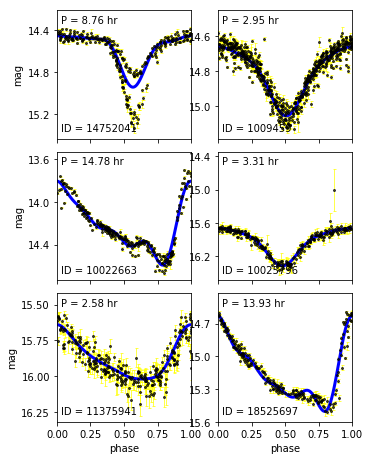

In [16]:
# select a subset of the full dataset
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]

# Compute the best frequencies
results, om_best = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

# Plot the phased light-curves
myprettyplot = plot_lightcurves(results, ids)

#### Selecting first 100 stars and finding their periods

In [22]:
#Using the first 100 objects of the LINEAR dataset
main_ids = data.ids[:100]

# Computing the best frequencies for the first 100 objects
results_main, om_best_main = compute_best_frequencies(main_ids, n_eval=10000, n_retry=5)

@pickle_results: using precomputed results from 'Ash_LINEAR_100objects.pkl'


No. of objects selected in the range 0<T<25 hr:  98


([<matplotlib.axis.XTick at 0x7f6126e39400>,
 <a list of 25 Text xticklabel objects>)

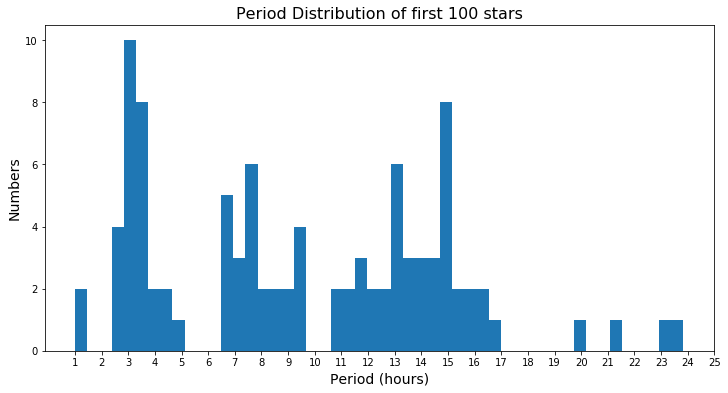

In [29]:
#Computing Periods
period_main = (2 * np.pi / om_best_main)*24

#Plotting the histogram
cond = (period_main>0)&(period_main<=25)
period_sel = period_main[cond]
print ("No. of objects selected in the range 0<T<25 hr: ", len(period_sel))
ticks = np.arange(1,26)
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(period_sel, bins=50)
ax.set_title("Period Distribution of first 100 stars", fontsize=16)
ax.set_xlabel("Period (hours)", fontsize=14)
ax.set_ylabel("Numbers", fontsize=14)
plt.xticks(ticks)

***COMMENT ON HISTOGRAM:*** From observing the histogram for 100 stars, we can see clustering pattern for some ranges. A very high peak is seen around P=3 hours, indicating many stars with that period. Further we can see stars with variable periods upto P = 17 hours and for periods greater than that, very few stars are seen. This indicates that our dataset has greater number of stas with shorter periods than longer periods, however, this may also be an observation bias.

### Plots of 6 stars each in highest and second highest peak

In [30]:
cond_peak1 = (period_main>2.5)&(period_main<3.5)
cond_peak2 = (period_main>14.5)&(period_main<15.5)
ids_peak1 = main_ids[cond_peak1]
ids_peak2 = main_ids[cond_peak2]
ids_peak1_6 = ids_peak1[:6]
ids_peak2_6 = ids_peak2[:6]

#### Stars from 1st highest peak (2.5 < P < 3.5)

@pickle_results: computing results and saving to 'Ash_LINEAR_100objects.pkl'
    - args match:   False
    - kwargs match: True
 * Computing power for 10003298 (196 points)
 >> For object: 10003298; Omega_best = 50.68860719
Iteration No:  1
 
 * Computing power for 10025796 (233 points)
 >> For object: 10025796; Omega_best = 45.55493503
Iteration No:  2
 
 * Computing power for 1009459 (593 points)
 >> For object: 1009459; Omega_best = 51.10600808
Iteration No:  3
 
 * Computing power for 10101561 (137 points)
 >> For object: 10101561; Omega_best = 44.9335195
Iteration No:  4
 
 * Computing power for 10102166 (213 points)
 >> For object: 10102166; Omega_best = 51.5246598
Iteration No:  5
 
 * Computing power for 10127760 (225 points)
 >> For object: 10127760; Omega_best = 45.77922442
Iteration No:  6
 
Plotting 6 stars from the first highest peak:
 


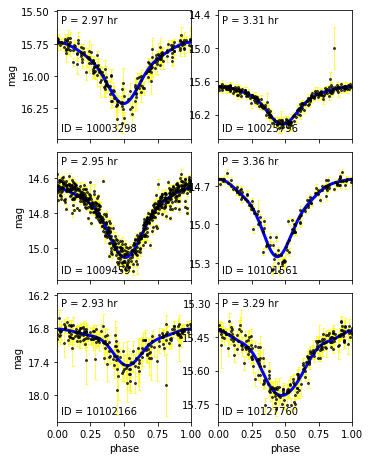

In [31]:
# Compute the best frequencies
results_peak1_6, om_best_peak1_6 = compute_best_frequencies(ids_peak1_6, n_eval=10000, n_retry=5)
#Plottign the phased light curves
print ("Plotting 6 stars from the first highest peak:")
myprettyplot = plot_lightcurves(results_peak1_6, ids_peak1_6)
print (" ")

##### Stars from the second peak  (14.5 < P <15.5)

@pickle_results: computing results and saving to 'Ash_LINEAR_100objects.pkl'
    - args match:   False
    - kwargs match: True
 * Computing power for 10022663 (246 points)
 >> For object: 10022663; Omega_best = 10.20062676
Iteration No:  1
 
 * Computing power for 10040133 (257 points)
 >> For object: 10040133; Omega_best = 10.29120901
Iteration No:  2
 
 * Computing power for 10046720 (136 points)
 >> For object: 10046720; Omega_best = 10.0363784
Iteration No:  3
 
 * Computing power for 10064356 (291 points)
 >> For object: 10064356; Omega_best = 10.00077894
Iteration No:  4
 
 * Computing power for 10100966 (168 points)
 >> For object: 10100966; Omega_best = 10.19760776
Iteration No:  5
 
 * Computing power for 10123919 (208 points)
 >> For object: 10123919; Omega_best = 10.01908601
Iteration No:  6
 
Plotting 6 stars from the second highest peak:
 


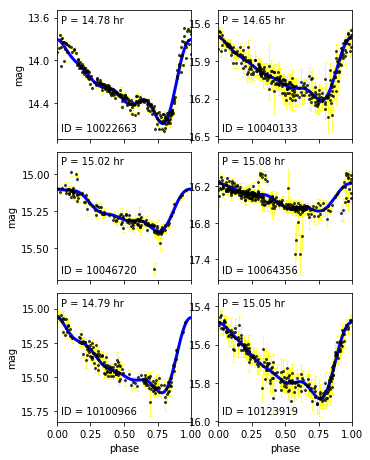

In [51]:
#Computing the best frequencies
results_peak2_6, om_best_peak2_6 = compute_best_frequencies(ids_peak2_6, n_eval=10000, n_retry=5)

#Plotting the phased light curves
print ("Plotting 6 stars from the second highest peak:")
myprettyplot = plot_lightcurves(results_peak2_6, ids_peak2_6)
print (" ")

***COMMENT ON STARS PLOT:***

***For stars in 1st peak:***
* The stars from the highest first peak have a uniform light curve which increases and decreases in brightness in the same time during one variability cycle. 

* The minimum of the light curves is at Phase = 0.5.

* All stars show a similarly symmetric light curve. 

* Amplitude of variability is quite similar for all stars.

* As plotted, these stars have Periods in range of 2.5-3.5 hours.

***For stars in 2nd peak:***

* The stars from the second peak have quite different light curves.

* These aren't as symmetric as the previous case. The intensity decreases gradually, hitting a minimum at about 0.75 of the phase and increases comparatively quickly back to the original levels.

*  A special feature of these stars is that they show a tiny bump of increasing magnitude before reaching minimum. This pattern can be seen for all stars, looks sort of like the pattern shown by ***<u>Cepheid stars</u>***.

* Amplitude of variability is quite similar for all stars.

* As plotted, these stars have periods in range of 14.5-15.5 hours.

### Extra Credit part: For all 7010 stars 

In [19]:
#Using all the objects of the LINEAR dataset
ids_all = data.ids[:]
print ("Total no. of objects: ", len(ids_all))

# Computing the best frequencies for the first 100 objects
results_all, om_best_all = compute_best_frequencies(ids_all, n_eval=10000, n_retry=5)

Total no. of objects:  7010
@pickle_results: computing results and saving to 'Ash_LINEAR_allobjects.pkl'
 * Computing power for 10003298 (196 points)
 >> For object: 10003298; Omega_best = 50.68860719
Iteration No:  1
 
 * Computing power for 10004892 (269 points)
 >> For object: 10004892; Omega_best = 9.342274114
Iteration No:  2
 
 * Computing power for 10013411 (170 points)
 >> For object: 10013411; Omega_best = 11.31471267
Iteration No:  3
 
 * Computing power for 10021274 (214 points)
 >> For object: 10021274; Omega_best = 10.8907631
Iteration No:  4
 
 * Computing power for 10022663 (246 points)
 >> For object: 10022663; Omega_best = 10.20062676
Iteration No:  5
 
 * Computing power for 10025796 (233 points)
 >> For object: 10025796; Omega_best = 45.55493503
Iteration No:  6
 
 * Computing power for 10028253 (38 points)
 >> For object: 10028253; Omega_best = 7.535937452
Iteration No:  7
 
 * Computing power for 10030349 (255 points)
 >> For object: 10030349; Omega_best = 11.52701

 >> For object: 10298947; Omega_best = 13.77956116
Iteration No:  71
 
 * Computing power for 10304077 (131 points)
 >> For object: 10304077; Omega_best = 49.51997338
Iteration No:  72
 
 * Computing power for 10307294 (222 points)
 >> For object: 10307294; Omega_best = 9.80868295
Iteration No:  73
 
 * Computing power for 10309167 (266 points)
 >> For object: 10309167; Omega_best = 19.38175914
Iteration No:  74
 
 * Computing power for 10312182 (209 points)
 >> For object: 10312182; Omega_best = 11.83851253
Iteration No:  75
 
 * Computing power for 10321095 (443 points)
 >> For object: 10321095; Omega_best = 18.76749964
Iteration No:  76
 
 * Computing power for 1032186 (140 points)
 >> For object: 1032186; Omega_best = 19.20132828
Iteration No:  77
 
 * Computing power for 10322215 (536 points)
 >> For object: 10322215; Omega_best = 6.329473792
Iteration No:  78
 
 * Computing power for 10324405 (457 points)
 >> For object: 10324405; Omega_best = 11.0257118
Iteration No:  79
 
 * Co

 >> For object: 10488093; Omega_best = 11.1991971
Iteration No:  142
 
 * Computing power for 10494061 (256 points)
 >> For object: 10494061; Omega_best = 10.9083429
Iteration No:  143
 
 * Computing power for 10495321 (278 points)
 >> For object: 10495321; Omega_best = 11.99426977
Iteration No:  144
 
 * Computing power for 1049602 (220 points)
 >> For object: 1049602; Omega_best = 20.80446557
Iteration No:  145
 
 * Computing power for 10498524 (266 points)
 >> For object: 10498524; Omega_best = 8.830243791
Iteration No:  146
 
 * Computing power for 10503746 (264 points)
 >> For object: 10503746; Omega_best = 10.9547656
Iteration No:  147
 
 * Computing power for 1050401 (570 points)
 >> For object: 1050401; Omega_best = 47.15965038
Iteration No:  148
 
 * Computing power for 10505581 (282 points)
 >> For object: 10505581; Omega_best = 9.855312729
Iteration No:  149
 
 * Computing power for 10509093 (452 points)
 >> For object: 10509093; Omega_best = 36.20000528
Iteration No:  150
 

 >> For object: 10702354; Omega_best = 12.52642841
Iteration No:  213
 
 * Computing power for 10702870 (218 points)
 >> For object: 10702870; Omega_best = 3.397266306
Iteration No:  214
 
 * Computing power for 10703872 (188 points)
 >> For object: 10703872; Omega_best = 11.61475386
Iteration No:  215
 
 * Computing power for 10704779 (182 points)
 >> For object: 10704779; Omega_best = 5.476674087
Iteration No:  216
 
 * Computing power for 1071236 (508 points)
 >> For object: 1071236; Omega_best = 37.43681117
Iteration No:  217
 
 * Computing power for 10714683 (261 points)
 >> For object: 10714683; Omega_best = 10.10118971
Iteration No:  218
 
 * Computing power for 10716485 (215 points)
 >> For object: 10716485; Omega_best = 19.51858481
Iteration No:  219
 
 * Computing power for 10718368 (266 points)
 >> For object: 10718368; Omega_best = 51.30825656
Iteration No:  220
 
 * Computing power for 10722333 (193 points)
 >> For object: 10722333; Omega_best = 21.93717195
Iteration No:  

 >> For object: 10930979; Omega_best = 11.67801306
Iteration No:  284
 
 * Computing power for 10931205 (163 points)
 >> For object: 10931205; Omega_best = 33.98683306
Iteration No:  285
 
 * Computing power for 10933723 (213 points)
 >> For object: 10933723; Omega_best = 9.398694798
Iteration No:  286
 
 * Computing power for 10934597 (213 points)
 >> For object: 10934597; Omega_best = 8.733945315
Iteration No:  287
 
 * Computing power for 10944852 (199 points)
 >> For object: 10944852; Omega_best = 7.945462271
Iteration No:  288
 
 * Computing power for 10946569 (180 points)
 >> For object: 10946569; Omega_best = 27.31839194
Iteration No:  289
 
 * Computing power for 10954700 (422 points)
 >> For object: 10954700; Omega_best = 10.57053802
Iteration No:  290
 
 * Computing power for 10957462 (437 points)
 >> For object: 10957462; Omega_best = 11.63541643
Iteration No:  291
 
 * Computing power for 10958834 (450 points)
 >> For object: 10958834; Omega_best = 55.47070744
Iteration No:

 >> For object: 11142378; Omega_best = 17.6542891
Iteration No:  355
 
 * Computing power for 11143366 (241 points)
 >> For object: 11143366; Omega_best = 9.435420828
Iteration No:  356
 
 * Computing power for 11147762 (298 points)
 >> For object: 11147762; Omega_best = 46.85318303
Iteration No:  357
 
 * Computing power for 11149695 (202 points)
 >> For object: 11149695; Omega_best = 32.70528956
Iteration No:  358
 
 * Computing power for 11150338 (217 points)
 >> For object: 11150338; Omega_best = 33.62705246
Iteration No:  359
 
 * Computing power for 11151226 (216 points)
 >> For object: 11151226; Omega_best = 4.738562941
Iteration No:  360
 
 * Computing power for 11152402 (199 points)
 >> For object: 11152402; Omega_best = 20.1820495
Iteration No:  361
 
 * Computing power for 11155096 (164 points)
 >> For object: 11155096; Omega_best = 17.0408693
Iteration No:  362
 
 * Computing power for 11157808 (173 points)
 >> For object: 11157808; Omega_best = 32.76572676
Iteration No:  3

 >> For object: 11379304; Omega_best = 51.98243874
Iteration No:  426
 
 * Computing power for 11382007 (278 points)
 >> For object: 11382007; Omega_best = 9.778898714
Iteration No:  427
 
 * Computing power for 11385463 (223 points)
 >> For object: 11385463; Omega_best = 28.38406559
Iteration No:  428
 
 * Computing power for 11395106 (257 points)
 >> For object: 11395106; Omega_best = 50.56543975
Iteration No:  429
 
 * Computing power for 11400604 (277 points)
 >> For object: 11400604; Omega_best = 140.8316375
Iteration No:  430
 
 * Computing power for 11401230 (256 points)
 >> For object: 11401230; Omega_best = 36.06961406
Iteration No:  431
 
 * Computing power for 11408555 (254 points)
 >> For object: 11408555; Omega_best = 10.07126246
Iteration No:  432
 
 * Computing power for 11410670 (252 points)
 >> For object: 11410670; Omega_best = 10.52283221
Iteration No:  433
 
 * Computing power for 11413263 (218 points)
 >> For object: 11413263; Omega_best = 9.472072874
Iteration No:

 >> For object: 11644471; Omega_best = 11.85206079
Iteration No:  497
 
 * Computing power for 11651280 (258 points)
 >> For object: 11651280; Omega_best = 51.39456611
Iteration No:  498
 
 * Computing power for 11652004 (209 points)
 >> For object: 11652004; Omega_best = 9.779370623
Iteration No:  499
 
 * Computing power for 11657158 (87 points)
 >> For object: 11657158; Omega_best = 13.37805364
Iteration No:  500
 
 * Computing power for 11663372 (242 points)
 >> For object: 11663372; Omega_best = 12.38465413
Iteration No:  501
 
 * Computing power for 11667249 (281 points)
 >> For object: 11667249; Omega_best = 19.03126402
Iteration No:  502
 
 * Computing power for 11667868 (248 points)
 >> For object: 11667868; Omega_best = 10.83140195
Iteration No:  503
 
 * Computing power for 11672471 (81 points)
 >> For object: 11672471; Omega_best = 44.91018885
Iteration No:  504
 
 * Computing power for 11681432 (278 points)
 >> For object: 11681432; Omega_best = 17.45015818
Iteration No:  

 >> For object: 11935712; Omega_best = 4.931759306
Iteration No:  568
 
 * Computing power for 11936793 (231 points)
 >> For object: 11936793; Omega_best = 49.07031618
Iteration No:  569
 
 * Computing power for 11937119 (207 points)
 >> For object: 11937119; Omega_best = 91.32381291
Iteration No:  570
 
 * Computing power for 11942032 (203 points)
 >> For object: 11942032; Omega_best = 9.272666807
Iteration No:  571
 
 * Computing power for 11949036 (204 points)
 >> For object: 11949036; Omega_best = 10.9623906
Iteration No:  572
 
 * Computing power for 11953092 (256 points)
 >> For object: 11953092; Omega_best = 19.4435348
Iteration No:  573
 
 * Computing power for 11957623 (230 points)
 >> For object: 11957623; Omega_best = 41.88340701
Iteration No:  574
 
 * Computing power for 11960127 (217 points)
 >> For object: 11960127; Omega_best = 48.67120832
Iteration No:  575
 
 * Computing power for 1196152 (160 points)
 >> For object: 1196152; Omega_best = 22.66052145
Iteration No:  57

 >> For object: 12185834; Omega_best = 6.333258617
Iteration No:  639
 
 * Computing power for 12185998 (245 points)
 >> For object: 12185998; Omega_best = 51.6718904
Iteration No:  640
 
 * Computing power for 12191331 (235 points)
 >> For object: 12191331; Omega_best = 6.204966307
Iteration No:  641
 
 * Computing power for 12191421 (228 points)
 >> For object: 12191421; Omega_best = 10.88474998
Iteration No:  642
 
 * Computing power for 12192232 (223 points)
 >> For object: 12192232; Omega_best = 9.77892392
Iteration No:  643
 
 * Computing power for 12192263 (220 points)
 >> For object: 12192263; Omega_best = 11.06214989
Iteration No:  644
 
 * Computing power for 12200224 (157 points)
 >> For object: 12200224; Omega_best = 9.764679519
Iteration No:  645
 
 * Computing power for 12200391 (209 points)
 >> For object: 12200391; Omega_best = 36.41755793
Iteration No:  646
 
 * Computing power for 12201893 (166 points)
 >> For object: 12201893; Omega_best = 28.29247819
Iteration No:  

 >> For object: 12405343; Omega_best = 3.777937358
Iteration No:  710
 
 * Computing power for 1240665 (468 points)
 >> For object: 1240665; Omega_best = 9.933388414
Iteration No:  711
 
 * Computing power for 12409868 (121 points)
 >> For object: 12409868; Omega_best = 11.10771934
Iteration No:  712
 
 * Computing power for 1241164 (626 points)
 >> For object: 1241164; Omega_best = 14.66425641
Iteration No:  713
 
 * Computing power for 12412349 (221 points)
 >> For object: 12412349; Omega_best = 10.51826603
Iteration No:  714
 
 * Computing power for 124162 (214 points)
 >> For object: 124162; Omega_best = 47.31593959
Iteration No:  715
 
 * Computing power for 124320 (293 points)
 >> For object: 124320; Omega_best = 40.20910398
Iteration No:  716
 
 * Computing power for 12432194 (223 points)
 >> For object: 12432194; Omega_best = 35.60391623
Iteration No:  717
 
 * Computing power for 12432893 (248 points)
 >> For object: 12432893; Omega_best = 14.9163526
Iteration No:  718
 
 * Co

 >> For object: 12641788; Omega_best = 27.86037104
Iteration No:  781
 
 * Computing power for 12643891 (178 points)
 >> For object: 12643891; Omega_best = 38.42256748
Iteration No:  782
 
 * Computing power for 12644081 (147 points)
 >> For object: 12644081; Omega_best = 9.249855371
Iteration No:  783
 
 * Computing power for 12646605 (172 points)
 >> For object: 12646605; Omega_best = 47.9435555
Iteration No:  784
 
 * Computing power for 12650705 (168 points)
 >> For object: 12650705; Omega_best = 10.66688091
Iteration No:  785
 
 * Computing power for 12651916 (256 points)
 >> For object: 12651916; Omega_best = 21.29526692
Iteration No:  786
 
 * Computing power for 1265213 (293 points)
 >> For object: 1265213; Omega_best = 10.77571362
Iteration No:  787
 
 * Computing power for 12655997 (208 points)
 >> For object: 12655997; Omega_best = 9.232388652
Iteration No:  788
 
 * Computing power for 12657079 (195 points)
 >> For object: 12657079; Omega_best = 26.63811075
Iteration No:  7

 >> For object: 12873666; Omega_best = 34.74452909
Iteration No:  852
 
 * Computing power for 12876197 (216 points)
 >> For object: 12876197; Omega_best = 9.01530191
Iteration No:  853
 
 * Computing power for 12877772 (232 points)
 >> For object: 12877772; Omega_best = 10.14137459
Iteration No:  854
 
 * Computing power for 12878768 (200 points)
 >> For object: 12878768; Omega_best = 10.02415864
Iteration No:  855
 
 * Computing power for 12880937 (37 points)
 >> For object: 12880937; Omega_best = 6.939603358
Iteration No:  856
 
 * Computing power for 12882652 (209 points)
 >> For object: 12882652; Omega_best = 56.57181377
Iteration No:  857
 
 * Computing power for 12886960 (192 points)
 >> For object: 12886960; Omega_best = 40.33010138
Iteration No:  858
 
 * Computing power for 12887415 (221 points)
 >> For object: 12887415; Omega_best = 21.63670603
Iteration No:  859
 
 * Computing power for 12887864 (198 points)
 >> For object: 12887864; Omega_best = 21.75169231
Iteration No:  

 >> For object: 13095415; Omega_best = 37.46540094
Iteration No:  923
 
 * Computing power for 13102760 (299 points)
 >> For object: 13102760; Omega_best = 9.035133646
Iteration No:  924
 
 * Computing power for 13103579 (233 points)
 >> For object: 13103579; Omega_best = 10.87890225
Iteration No:  925
 
 * Computing power for 13104605 (275 points)
 >> For object: 13104605; Omega_best = 10.32646577
Iteration No:  926
 
 * Computing power for 13109299 (265 points)
 >> For object: 13109299; Omega_best = 20.00546812
Iteration No:  927
 
 * Computing power for 13112616 (387 points)
 >> For object: 13112616; Omega_best = 9.626995664
Iteration No:  928
 
 * Computing power for 13112627 (239 points)
 >> For object: 13112627; Omega_best = 15.80696691
Iteration No:  929
 
 * Computing power for 13116521 (204 points)
 >> For object: 13116521; Omega_best = 10.03279941
Iteration No:  930
 
 * Computing power for 13119720 (256 points)
 >> For object: 13119720; Omega_best = 10.95725647
Iteration No:

 >> For object: 13331395; Omega_best = 9.715309539
Iteration No:  994
 
 * Computing power for 13333535 (214 points)
 >> For object: 13333535; Omega_best = 2.754730996
Iteration No:  995
 
 * Computing power for 13335662 (249 points)
 >> For object: 13335662; Omega_best = 10.63463857
Iteration No:  996
 
 * Computing power for 13338327 (226 points)
 >> For object: 13338327; Omega_best = 44.01591799
Iteration No:  997
 
 * Computing power for 13340259 (196 points)
 >> For object: 13340259; Omega_best = 35.27539268
Iteration No:  998
 
 * Computing power for 13342676 (213 points)
 >> For object: 13342676; Omega_best = 42.96753313
Iteration No:  999
 
 * Computing power for 13348504 (197 points)
 >> For object: 13348504; Omega_best = 16.57539618
Iteration No:  1000
 
 * Computing power for 13355848 (185 points)
 >> For object: 13355848; Omega_best = 10.78475251
Iteration No:  1001
 
 * Computing power for 13361210 (220 points)
 >> For object: 13361210; Omega_best = 7.693742449
Iteration N

 >> For object: 13603454; Omega_best = 8.136399314
Iteration No:  1064
 
 * Computing power for 13606134 (226 points)
 >> For object: 13606134; Omega_best = 83.11300902
Iteration No:  1065
 
 * Computing power for 13606534 (163 points)
 >> For object: 13606534; Omega_best = 58.12533035
Iteration No:  1066
 
 * Computing power for 13613269 (232 points)
 >> For object: 13613269; Omega_best = 48.03972838
Iteration No:  1067
 
 * Computing power for 13614607 (188 points)
 >> For object: 13614607; Omega_best = 6.05357974
Iteration No:  1068
 
 * Computing power for 13620414 (237 points)
 >> For object: 13620414; Omega_best = 10.717832
Iteration No:  1069
 
 * Computing power for 13628820 (226 points)
 >> For object: 13628820; Omega_best = 49.19193351
Iteration No:  1070
 
 * Computing power for 13633259 (199 points)
 >> For object: 13633259; Omega_best = 13.49798371
Iteration No:  1071
 
 * Computing power for 13637483 (42 points)
 >> For object: 13637483; Omega_best = 53.61502189
Iteration

 >> For object: 13852045; Omega_best = 26.11615439
Iteration No:  1134
 
 * Computing power for 13857654 (202 points)
 >> For object: 13857654; Omega_best = 11.18233144
Iteration No:  1135
 
 * Computing power for 13859117 (190 points)
 >> For object: 13859117; Omega_best = 9.614052336
Iteration No:  1136
 
 * Computing power for 13865387 (215 points)
 >> For object: 13865387; Omega_best = 16.46656095
Iteration No:  1137
 
 * Computing power for 13866427 (206 points)
 >> For object: 13866427; Omega_best = 12.03723087
Iteration No:  1138
 
 * Computing power for 1387057 (564 points)
 >> For object: 1387057; Omega_best = 6.297960891
Iteration No:  1139
 
 * Computing power for 13871104 (202 points)
 >> For object: 13871104; Omega_best = 11.70303509
Iteration No:  1140
 
 * Computing power for 13883388 (215 points)
 >> For object: 13883388; Omega_best = 10.35773013
Iteration No:  1141
 
 * Computing power for 13889488 (149 points)
 >> For object: 13889488; Omega_best = 10.54235061
Iterati

 >> For object: 14142720; Omega_best = 15.95153597
Iteration No:  1204
 
 * Computing power for 14143062 (201 points)
 >> For object: 14143062; Omega_best = 6.297247306
Iteration No:  1205
 
 * Computing power for 14144390 (218 points)
 >> For object: 14144390; Omega_best = 49.67198683
Iteration No:  1206
 
 * Computing power for 14144427 (204 points)
 >> For object: 14144427; Omega_best = 29.35145825
Iteration No:  1207
 
 * Computing power for 14148882 (233 points)
 >> For object: 14148882; Omega_best = 15.07843164
Iteration No:  1208
 
 * Computing power for 14149087 (239 points)
 >> For object: 14149087; Omega_best = 10.12691579
Iteration No:  1209
 
 * Computing power for 14149757 (233 points)
 >> For object: 14149757; Omega_best = 43.62309457
Iteration No:  1210
 
 * Computing power for 14151896 (234 points)
 >> For object: 14151896; Omega_best = 6.293169834
Iteration No:  1211
 
 * Computing power for 14153847 (226 points)
 >> For object: 14153847; Omega_best = 48.80707878
Itera

 >> For object: 14330554; Omega_best = 12.58604268
Iteration No:  1274
 
 * Computing power for 14332473 (227 points)
 >> For object: 14332473; Omega_best = 43.75392184
Iteration No:  1275
 
 * Computing power for 14337546 (233 points)
 >> For object: 14337546; Omega_best = 27.47534037
Iteration No:  1276
 
 * Computing power for 14339202 (231 points)
 >> For object: 14339202; Omega_best = 60.63175011
Iteration No:  1277
 
 * Computing power for 1434107 (528 points)
 >> For object: 1434107; Omega_best = 12.27334128
Iteration No:  1278
 
 * Computing power for 14350834 (230 points)
 >> For object: 14350834; Omega_best = 41.10935175
Iteration No:  1279
 
 * Computing power for 14351896 (245 points)
 >> For object: 14351896; Omega_best = 9.282291413
Iteration No:  1280
 
 * Computing power for 1435279 (545 points)
 >> For object: 1435279; Omega_best = 16.45406506
Iteration No:  1281
 
 * Computing power for 14355066 (249 points)
 >> For object: 14355066; Omega_best = 42.00240455
Iteration

 >> For object: 14534492; Omega_best = 11.38000519
Iteration No:  1344
 
 * Computing power for 14538995 (213 points)
 >> For object: 14538995; Omega_best = 46.83766013
Iteration No:  1345
 
 * Computing power for 14539006 (197 points)
 >> For object: 14539006; Omega_best = 15.82001814
Iteration No:  1346
 
 * Computing power for 14539636 (206 points)
 >> For object: 14539636; Omega_best = 10.38238588
Iteration No:  1347
 
 * Computing power for 14543826 (202 points)
 >> For object: 14543826; Omega_best = 7.158603416
Iteration No:  1348
 
 * Computing power for 14545485 (204 points)
 >> For object: 14545485; Omega_best = 42.95885671
Iteration No:  1349
 
 * Computing power for 14549195 (222 points)
 >> For object: 14549195; Omega_best = 122.1030664
Iteration No:  1350
 
 * Computing power for 14550152 (220 points)
 >> For object: 14550152; Omega_best = 10.32365662
Iteration No:  1351
 
 * Computing power for 14553146 (211 points)
 >> For object: 14553146; Omega_best = 47.58671693
Itera

 >> For object: 14758749; Omega_best = 11.71136238
Iteration No:  1414
 
 * Computing power for 14759790 (219 points)
 >> For object: 14759790; Omega_best = 40.91547026
Iteration No:  1415
 
 * Computing power for 14759918 (211 points)
 >> For object: 14759918; Omega_best = 17.75755068
Iteration No:  1416
 
 * Computing power for 14761028 (175 points)
 >> For object: 14761028; Omega_best = 35.09374902
Iteration No:  1417
 
 * Computing power for 14761159 (179 points)
 >> For object: 14761159; Omega_best = 10.75230806
Iteration No:  1418
 
 * Computing power for 14761509 (199 points)
 >> For object: 14761509; Omega_best = 9.651048565
Iteration No:  1419
 
 * Computing power for 14763247 (156 points)
 >> For object: 14763247; Omega_best = 6.293447048
Iteration No:  1420
 
 * Computing power for 14765223 (201 points)
 >> For object: 14765223; Omega_best = 6.290357371
Iteration No:  1421
 
 * Computing power for 14768675 (196 points)
 >> For object: 14768675; Omega_best = 40.3080543
Iterat

 >> For object: 14920151; Omega_best = 14.82056868
Iteration No:  1484
 
 * Computing power for 1492054 (339 points)
 >> For object: 1492054; Omega_best = 17.61702259
Iteration No:  1485
 
 * Computing power for 14921022 (202 points)
 >> For object: 14921022; Omega_best = 18.36310988
Iteration No:  1486
 
 * Computing power for 1492129 (339 points)
 >> For object: 1492129; Omega_best = 10.0103435
Iteration No:  1487
 
 * Computing power for 14929154 (191 points)
 >> For object: 14929154; Omega_best = 12.53546931
Iteration No:  1488
 
 * Computing power for 14931207 (162 points)
 >> For object: 14931207; Omega_best = 43.00839468
Iteration No:  1489
 
 * Computing power for 14934582 (226 points)
 >> For object: 14934582; Omega_best = 38.90166348
Iteration No:  1490
 
 * Computing power for 14934668 (182 points)
 >> For object: 14934668; Omega_best = 18.87632578
Iteration No:  1491
 
 * Computing power for 14935587 (192 points)
 >> For object: 14935587; Omega_best = 24.7098389
Iteration N

 >> For object: 15071248; Omega_best = 3.700115202
Iteration No:  1554
 
 * Computing power for 15071715 (265 points)
 >> For object: 15071715; Omega_best = 6.298291091
Iteration No:  1555
 
 * Computing power for 15072375 (170 points)
 >> For object: 15072375; Omega_best = 49.87687782
Iteration No:  1556
 
 * Computing power for 15074884 (263 points)
 >> For object: 15074884; Omega_best = 9.850437616
Iteration No:  1557
 
 * Computing power for 15075296 (266 points)
 >> For object: 15075296; Omega_best = 11.97579232
Iteration No:  1558
 
 * Computing power for 1507701 (32 points)
 >> For object: 1507701; Omega_best = 1.724666152
Iteration No:  1559
 
 * Computing power for 15083119 (211 points)
 >> For object: 15083119; Omega_best = 9.756183903
Iteration No:  1560
 
 * Computing power for 15083281 (225 points)
 >> For object: 15083281; Omega_best = 12.41690107
Iteration No:  1561
 
 * Computing power for 15083431 (218 points)
 >> For object: 15083431; Omega_best = 11.56998294
Iteratio

 >> For object: 15223923; Omega_best = 30.28101422
Iteration No:  1624
 
 * Computing power for 15224721 (190 points)
 >> For object: 15224721; Omega_best = 10.76125158
Iteration No:  1625
 
 * Computing power for 15224885 (196 points)
 >> For object: 15224885; Omega_best = 5.937482596
Iteration No:  1626
 
 * Computing power for 15224915 (141 points)
 >> For object: 15224915; Omega_best = 7.498126666
Iteration No:  1627
 
 * Computing power for 15225757 (186 points)
 >> For object: 15225757; Omega_best = 37.79227863
Iteration No:  1628
 
 * Computing power for 15227408 (202 points)
 >> For object: 15227408; Omega_best = 12.4989072
Iteration No:  1629
 
 * Computing power for 15229778 (33 points)
 >> For object: 15229778; Omega_best = 21.18914592
Iteration No:  1630
 
 * Computing power for 15230073 (97 points)
 >> For object: 15230073; Omega_best = 38.08018852
Iteration No:  1631
 
 * Computing power for 15234545 (191 points)
 >> For object: 15234545; Omega_best = 12.8328474
Iteration

 >> For object: 15396099; Omega_best = 6.296336807
Iteration No:  1694
 
 * Computing power for 15396575 (213 points)
 >> For object: 15396575; Omega_best = 14.3758844
Iteration No:  1695
 
 * Computing power for 15404404 (206 points)
 >> For object: 15404404; Omega_best = 9.893129194
Iteration No:  1696
 
 * Computing power for 15404936 (187 points)
 >> For object: 15404936; Omega_best = 1.578105234
Iteration No:  1697
 
 * Computing power for 15409954 (165 points)
 >> For object: 15409954; Omega_best = 44.30889923
Iteration No:  1698
 
 * Computing power for 15410217 (185 points)
 >> For object: 15410217; Omega_best = 19.06513805
Iteration No:  1699
 
 * Computing power for 15413302 (186 points)
 >> For object: 15413302; Omega_best = 9.134322024
Iteration No:  1700
 
 * Computing power for 15414779 (185 points)
 >> For object: 15414779; Omega_best = 43.29163643
Iteration No:  1701
 
 * Computing power for 15415747 (189 points)
 >> For object: 15415747; Omega_best = 33.60683549
Iterat

 >> For object: 15572875; Omega_best = 1.314342061
Iteration No:  1764
 
 * Computing power for 15574610 (220 points)
 >> For object: 15574610; Omega_best = 37.35186111
Iteration No:  1765
 
 * Computing power for 15574933 (217 points)
 >> For object: 15574933; Omega_best = 39.38369341
Iteration No:  1766
 
 * Computing power for 15577933 (216 points)
 >> For object: 15577933; Omega_best = 12.53454481
Iteration No:  1767
 
 * Computing power for 15580262 (205 points)
 >> For object: 15580262; Omega_best = 12.59796422
Iteration No:  1768
 
 * Computing power for 15582617 (186 points)
 >> For object: 15582617; Omega_best = 27.49306401
Iteration No:  1769
 
 * Computing power for 15582770 (152 points)
 >> For object: 15582770; Omega_best = 11.89299224
Iteration No:  1770
 
 * Computing power for 15583616 (201 points)
 >> For object: 15583616; Omega_best = 12.59820487
Iteration No:  1771
 
 * Computing power for 15588218 (203 points)
 >> For object: 15588218; Omega_best = 13.02969545
Itera

 >> For object: 15739880; Omega_best = 46.70977737
Iteration No:  1834
 
 * Computing power for 15744353 (237 points)
 >> For object: 15744353; Omega_best = 41.79089756
Iteration No:  1835
 
 * Computing power for 15748224 (230 points)
 >> For object: 15748224; Omega_best = 39.43503583
Iteration No:  1836
 
 * Computing power for 15748251 (230 points)
 >> For object: 15748251; Omega_best = 52.80010127
Iteration No:  1837
 
 * Computing power for 15751544 (236 points)
 >> For object: 15751544; Omega_best = 11.92858015
Iteration No:  1838
 
 * Computing power for 15756106 (167 points)
 >> For object: 15756106; Omega_best = 38.84599087
Iteration No:  1839
 
 * Computing power for 15761861 (184 points)
 >> For object: 15761861; Omega_best = 3.850979424
Iteration No:  1840
 
 * Computing power for 15769416 (198 points)
 >> For object: 15769416; Omega_best = 14.36365632
Iteration No:  1841
 
 * Computing power for 15777228 (177 points)
 >> For object: 15777228; Omega_best = 14.79328076
Itera

 >> For object: 1593736; Omega_best = 10.60226073
Iteration No:  1904
 
 * Computing power for 1593753 (299 points)
 >> For object: 1593753; Omega_best = 41.72186862
Iteration No:  1905
 
 * Computing power for 15943659 (176 points)
 >> For object: 15943659; Omega_best = 6.290837642
Iteration No:  1906
 
 * Computing power for 15944489 (167 points)
 >> For object: 15944489; Omega_best = 6.302927705
Iteration No:  1907
 
 * Computing power for 15945950 (170 points)
 >> For object: 15945950; Omega_best = 19.13251241
Iteration No:  1908
 
 * Computing power for 15946049 (195 points)
 >> For object: 15946049; Omega_best = 12.45568498
Iteration No:  1909
 
 * Computing power for 15946130 (190 points)
 >> For object: 15946130; Omega_best = 12.5851572
Iteration No:  1910
 
 * Computing power for 15948828 (184 points)
 >> For object: 15948828; Omega_best = 8.048172084
Iteration No:  1911
 
 * Computing power for 15948986 (191 points)
 >> For object: 15948986; Omega_best = 8.40211423
Iteration 

 >> For object: 16131073; Omega_best = 11.14350487
Iteration No:  1974
 
 * Computing power for 16132098 (210 points)
 >> For object: 16132098; Omega_best = 17.99240451
Iteration No:  1975
 
 * Computing power for 16134738 (237 points)
 >> For object: 16134738; Omega_best = 20.11229352
Iteration No:  1976
 
 * Computing power for 16134759 (204 points)
 >> For object: 16134759; Omega_best = 2.622534597
Iteration No:  1977
 
 * Computing power for 16139119 (223 points)
 >> For object: 16139119; Omega_best = 9.084875559
Iteration No:  1978
 
 * Computing power for 16143244 (215 points)
 >> For object: 16143244; Omega_best = 1.663678636
Iteration No:  1979
 
 * Computing power for 16148093 (209 points)
 >> For object: 16148093; Omega_best = 46.07593364
Iteration No:  1980
 
 * Computing power for 16148758 (216 points)
 >> For object: 16148758; Omega_best = 13.79739968
Iteration No:  1981
 
 * Computing power for 16151207 (207 points)
 >> For object: 16151207; Omega_best = 4.054166857
Itera

 >> For object: 16307310; Omega_best = 19.24326427
Iteration No:  2044
 
 * Computing power for 16308462 (174 points)
 >> For object: 16308462; Omega_best = 10.87117121
Iteration No:  2045
 
 * Computing power for 16310920 (198 points)
 >> For object: 16310920; Omega_best = 6.291279299
Iteration No:  2046
 
 * Computing power for 16318334 (214 points)
 >> For object: 16318334; Omega_best = 9.418545792
Iteration No:  2047
 
 * Computing power for 16318648 (213 points)
 >> For object: 16318648; Omega_best = 6.296681193
Iteration No:  2048
 
 * Computing power for 16319448 (196 points)
 >> For object: 16319448; Omega_best = 13.62809231
Iteration No:  2049
 
 * Computing power for 16321584 (204 points)
 >> For object: 16321584; Omega_best = 6.30234073
Iteration No:  2050
 
 * Computing power for 16322075 (194 points)
 >> For object: 16322075; Omega_best = 22.1574884
Iteration No:  2051
 
 * Computing power for 16322742 (210 points)
 >> For object: 16322742; Omega_best = 40.43042544
Iterati

 >> For object: 16489557; Omega_best = 6.316483232
Iteration No:  2114
 
 * Computing power for 16491168 (213 points)
 >> For object: 16491168; Omega_best = 6.513846159
Iteration No:  2115
 
 * Computing power for 16492583 (247 points)
 >> For object: 16492583; Omega_best = 16.93421593
Iteration No:  2116
 
 * Computing power for 16494763 (252 points)
 >> For object: 16494763; Omega_best = 14.22614859
Iteration No:  2117
 
 * Computing power for 16496571 (210 points)
 >> For object: 16496571; Omega_best = 10.34327522
Iteration No:  2118
 
 * Computing power for 16498188 (197 points)
 >> For object: 16498188; Omega_best = 13.53789457
Iteration No:  2119
 
 * Computing power for 16498989 (221 points)
 >> For object: 16498989; Omega_best = 2.097895011
Iteration No:  2120
 
 * Computing power for 16501948 (205 points)
 >> For object: 16501948; Omega_best = 40.23445104
Iteration No:  2121
 
 * Computing power for 16502234 (198 points)
 >> For object: 16502234; Omega_best = 12.84012938
Itera

 >> For object: 16650827; Omega_best = 25.18668924
Iteration No:  2184
 
 * Computing power for 16651490 (177 points)
 >> For object: 16651490; Omega_best = 9.773930535
Iteration No:  2185
 
 * Computing power for 16651591 (213 points)
 >> For object: 16651591; Omega_best = 13.2102917
Iteration No:  2186
 
 * Computing power for 16653662 (180 points)
 >> For object: 16653662; Omega_best = 38.52390977
Iteration No:  2187
 
 * Computing power for 16657358 (173 points)
 >> For object: 16657358; Omega_best = 6.069133873
Iteration No:  2188
 
 * Computing power for 16657659 (152 points)
 >> For object: 16657659; Omega_best = 8.265923271
Iteration No:  2189
 
 * Computing power for 16659101 (189 points)
 >> For object: 16659101; Omega_best = 39.91319865
Iteration No:  2190
 
 * Computing power for 16659561 (201 points)
 >> For object: 16659561; Omega_best = 14.94764558
Iteration No:  2191
 
 * Computing power for 16660233 (178 points)
 >> For object: 16660233; Omega_best = 10.36310914
Iterat

 >> For object: 1682540; Omega_best = 18.6970713
Iteration No:  2254
 
 * Computing power for 16831425 (184 points)
 >> For object: 16831425; Omega_best = 8.72207754
Iteration No:  2255
 
 * Computing power for 1683151 (427 points)
 >> For object: 1683151; Omega_best = 101.5936744
Iteration No:  2256
 
 * Computing power for 16832817 (197 points)
 >> For object: 16832817; Omega_best = 11.94339499
Iteration No:  2257
 
 * Computing power for 1683589 (405 points)
 >> For object: 1683589; Omega_best = 12.60434387
Iteration No:  2258
 
 * Computing power for 16837045 (228 points)
 >> For object: 16837045; Omega_best = 16.76005025
Iteration No:  2259
 
 * Computing power for 16837728 (230 points)
 >> For object: 16837728; Omega_best = 58.18931197
Iteration No:  2260
 
 * Computing power for 16846842 (402 points)
 >> For object: 16846842; Omega_best = 10.34304333
Iteration No:  2261
 
 * Computing power for 1684856 (420 points)
 >> For object: 1684856; Omega_best = 12.04189402
Iteration No: 

 >> For object: 17108059; Omega_best = 9.291935336
Iteration No:  2324
 
 * Computing power for 17117879 (299 points)
 >> For object: 17117879; Omega_best = 3.063679243
Iteration No:  2325
 
 * Computing power for 17120218 (266 points)
 >> For object: 17120218; Omega_best = 51.0460174
Iteration No:  2326
 
 * Computing power for 17125494 (210 points)
 >> For object: 17125494; Omega_best = 41.63490311
Iteration No:  2327
 
 * Computing power for 17130728 (294 points)
 >> For object: 17130728; Omega_best = 18.95104625
Iteration No:  2328
 
 * Computing power for 17132435 (318 points)
 >> For object: 17132435; Omega_best = 34.21358848
Iteration No:  2329
 
 * Computing power for 17133581 (212 points)
 >> For object: 17133581; Omega_best = 12.44640124
Iteration No:  2330
 
 * Computing power for 17142032 (554 points)
 >> For object: 17142032; Omega_best = 3.044387442
Iteration No:  2331
 
 * Computing power for 17143089 (543 points)
 >> For object: 17143089; Omega_best = 12.57962678
Iterat

 >> For object: 17433084; Omega_best = 27.32931636
Iteration No:  2394
 
 * Computing power for 1743519 (167 points)
 >> For object: 1743519; Omega_best = 44.21627585
Iteration No:  2395
 
 * Computing power for 17436807 (496 points)
 >> For object: 17436807; Omega_best = 10.95142685
Iteration No:  2396
 
 * Computing power for 174389 (270 points)
 >> For object: 174389; Omega_best = 18.80993536
Iteration No:  2397
 
 * Computing power for 17444609 (489 points)
 >> For object: 17444609; Omega_best = 11.13106721
Iteration No:  2398
 
 * Computing power for 17452152 (549 points)
 >> For object: 17452152; Omega_best = 11.67666184
Iteration No:  2399
 
 * Computing power for 1746311 (226 points)
 >> For object: 1746311; Omega_best = 19.68445131
Iteration No:  2400
 
 * Computing power for 17463281 (550 points)
 >> For object: 17463281; Omega_best = 34.16768381
Iteration No:  2401
 
 * Computing power for 17475914 (333 points)
 >> For object: 17475914; Omega_best = 11.65549153
Iteration No:

 >> For object: 17701075; Omega_best = 9.640684904
Iteration No:  2464
 
 * Computing power for 17703382 (261 points)
 >> For object: 17703382; Omega_best = 10.64604325
Iteration No:  2465
 
 * Computing power for 17710182 (246 points)
 >> For object: 17710182; Omega_best = 23.25679384
Iteration No:  2466
 
 * Computing power for 17715248 (296 points)
 >> For object: 17715248; Omega_best = 55.98048951
Iteration No:  2467
 
 * Computing power for 17719862 (169 points)
 >> For object: 17719862; Omega_best = 43.11139627
Iteration No:  2468
 
 * Computing power for 17720776 (194 points)
 >> For object: 17720776; Omega_best = 20.03377265
Iteration No:  2469
 
 * Computing power for 177235 (204 points)
 >> For object: 177235; Omega_best = 39.1986499
Iteration No:  2470
 
 * Computing power for 17728581 (153 points)
 >> For object: 17728581; Omega_best = 10.1287672
Iteration No:  2471
 
 * Computing power for 17729039 (545 points)
 >> For object: 17729039; Omega_best = 16.07664558
Iteration N

 >> For object: 17909981; Omega_best = 44.28393485
Iteration No:  2534
 
 * Computing power for 17915724 (177 points)
 >> For object: 17915724; Omega_best = 10.25359817
Iteration No:  2535
 
 * Computing power for 17918883 (210 points)
 >> For object: 17918883; Omega_best = 20.48778544
Iteration No:  2536
 
 * Computing power for 17919470 (44 points)
 >> For object: 17919470; Omega_best = 52.56255291
Iteration No:  2537
 
 * Computing power for 17919686 (204 points)
 >> For object: 17919686; Omega_best = 12.35202633
Iteration No:  2538
 
 * Computing power for 17923879 (165 points)
 >> For object: 17923879; Omega_best = 43.55434
Iteration No:  2539
 
 * Computing power for 17928126 (206 points)
 >> For object: 17928126; Omega_best = 11.31171841
Iteration No:  2540
 
 * Computing power for 1793190 (537 points)
 >> For object: 1793190; Omega_best = 58.85112929
Iteration No:  2541
 
 * Computing power for 17934303 (128 points)
 >> For object: 17934303; Omega_best = 14.09246311
Iteration N

 >> For object: 18102636; Omega_best = 17.87713821
Iteration No:  2604
 
 * Computing power for 18108134 (133 points)
 >> For object: 18108134; Omega_best = 9.417953207
Iteration No:  2605
 
 * Computing power for 18115616 (198 points)
 >> For object: 18115616; Omega_best = 17.62262892
Iteration No:  2606
 
 * Computing power for 1811983 (252 points)
 >> For object: 1811983; Omega_best = 39.51355533
Iteration No:  2607
 
 * Computing power for 18122794 (155 points)
 >> For object: 18122794; Omega_best = 12.84353815
Iteration No:  2608
 
 * Computing power for 18124350 (205 points)
 >> For object: 18124350; Omega_best = 6.739238764
Iteration No:  2609
 
 * Computing power for 18126624 (194 points)
 >> For object: 18126624; Omega_best = 14.01894538
Iteration No:  2610
 
 * Computing power for 18133967 (215 points)
 >> For object: 18133967; Omega_best = 87.77728148
Iteration No:  2611
 
 * Computing power for 18140612 (199 points)
 >> For object: 18140612; Omega_best = 38.27377368
Iterati

 >> For object: 18348664; Omega_best = 8.898257841
Iteration No:  2674
 
 * Computing power for 18349071 (205 points)
 >> For object: 18349071; Omega_best = 19.35919513
Iteration No:  2675
 
 * Computing power for 18352204 (181 points)
 >> For object: 18352204; Omega_best = 27.40361312
Iteration No:  2676
 
 * Computing power for 18355256 (207 points)
 >> For object: 18355256; Omega_best = 37.03214323
Iteration No:  2677
 
 * Computing power for 18356591 (171 points)
 >> For object: 18356591; Omega_best = 39.87682747
Iteration No:  2678
 
 * Computing power for 18358062 (218 points)
 >> For object: 18358062; Omega_best = 53.18799223
Iteration No:  2679
 
 * Computing power for 18362454 (235 points)
 >> For object: 18362454; Omega_best = 24.96322072
Iteration No:  2680
 
 * Computing power for 18365343 (220 points)
 >> For object: 18365343; Omega_best = 20.42777979
Iteration No:  2681
 
 * Computing power for 18366877 (243 points)
 >> For object: 18366877; Omega_best = 40.23567784
Itera

 >> For object: 18502454; Omega_best = 7.717881021
Iteration No:  2744
 
 * Computing power for 18504033 (223 points)
 >> For object: 18504033; Omega_best = 10.76441354
Iteration No:  2745
 
 * Computing power for 18508280 (199 points)
 >> For object: 18508280; Omega_best = 9.690846011
Iteration No:  2746
 
 * Computing power for 18510465 (188 points)
 >> For object: 18510465; Omega_best = 11.16063166
Iteration No:  2747
 
 * Computing power for 18512447 (177 points)
 >> For object: 18512447; Omega_best = 20.74465121
Iteration No:  2748
 
 * Computing power for 1851295 (317 points)
 >> For object: 1851295; Omega_best = 17.09617955
Iteration No:  2749
 
 * Computing power for 18514233 (162 points)
 >> For object: 18514233; Omega_best = 12.58527524
Iteration No:  2750
 
 * Computing power for 18515114 (116 points)
 >> For object: 18515114; Omega_best = 17.22138816
Iteration No:  2751
 
 * Computing power for 18516711 (126 points)
 >> For object: 18516711; Omega_best = 11.1211231
Iteratio

 >> For object: 18687637; Omega_best = 12.72949325
Iteration No:  2814
 
 * Computing power for 18688625 (231 points)
 >> For object: 18688625; Omega_best = 21.89217273
Iteration No:  2815
 
 * Computing power for 18691568 (211 points)
 >> For object: 18691568; Omega_best = 32.03049019
Iteration No:  2816
 
 * Computing power for 1869417 (61 points)
 >> For object: 1869417; Omega_best = 2.580379911
Iteration No:  2817
 
 * Computing power for 18695200 (225 points)
 >> For object: 18695200; Omega_best = 23.01568848
Iteration No:  2818
 
 * Computing power for 18702507 (169 points)
 >> For object: 18702507; Omega_best = 19.71076431
Iteration No:  2819
 
 * Computing power for 1870290 (280 points)
 >> For object: 1870290; Omega_best = 46.58916931
Iteration No:  2820
 
 * Computing power for 18708980 (209 points)
 >> For object: 18708980; Omega_best = 10.01449672
Iteration No:  2821
 
 * Computing power for 18709742 (142 points)
 >> For object: 18709742; Omega_best = 11.65909549
Iteration 

 >> For object: 18880747; Omega_best = 6.207903617
Iteration No:  2884
 
 * Computing power for 18881768 (186 points)
 >> For object: 18881768; Omega_best = 21.61408497
Iteration No:  2885
 
 * Computing power for 18886854 (217 points)
 >> For object: 18886854; Omega_best = 36.53750154
Iteration No:  2886
 
 * Computing power for 18892285 (75 points)
 >> For object: 18892285; Omega_best = 24.31897319
Iteration No:  2887
 
 * Computing power for 18893679 (223 points)
 >> For object: 18893679; Omega_best = 18.41217534
Iteration No:  2888
 
 * Computing power for 18895805 (217 points)
 >> For object: 18895805; Omega_best = 12.8206079
Iteration No:  2889
 
 * Computing power for 18896137 (224 points)
 >> For object: 18896137; Omega_best = 12.58208696
Iteration No:  2890
 
 * Computing power for 18901395 (154 points)
 >> For object: 18901395; Omega_best = 12.59124318
Iteration No:  2891
 
 * Computing power for 1890167 (269 points)
 >> For object: 1890167; Omega_best = 9.647418965
Iteration

 >> For object: 19063684; Omega_best = 10.25007323
Iteration No:  2954
 
 * Computing power for 19065176 (202 points)
 >> For object: 19065176; Omega_best = 41.1762381
Iteration No:  2955
 
 * Computing power for 19070350 (163 points)
 >> For object: 19070350; Omega_best = 11.66892004
Iteration No:  2956
 
 * Computing power for 19077652 (204 points)
 >> For object: 19077652; Omega_best = 14.67178504
Iteration No:  2957
 
 * Computing power for 19082421 (210 points)
 >> For object: 19082421; Omega_best = 11.17246805
Iteration No:  2958
 
 * Computing power for 19082457 (202 points)
 >> For object: 19082457; Omega_best = 4.972429054
Iteration No:  2959
 
 * Computing power for 19097115 (188 points)
 >> For object: 19097115; Omega_best = 46.94649398
Iteration No:  2960
 
 * Computing power for 19100907 (214 points)
 >> For object: 19100907; Omega_best = 9.313300133
Iteration No:  2961
 
 * Computing power for 19102362 (191 points)
 >> For object: 19102362; Omega_best = 17.57551323
Iterat

 >> For object: 19338009; Omega_best = 46.80172902
Iteration No:  3024
 
 * Computing power for 19339109 (200 points)
 >> For object: 19339109; Omega_best = 23.13000126
Iteration No:  3025
 
 * Computing power for 19343622 (134 points)
 >> For object: 19343622; Omega_best = 45.45542458
Iteration No:  3026
 
 * Computing power for 19343889 (205 points)
 >> For object: 19343889; Omega_best = 10.304691
Iteration No:  3027
 
 * Computing power for 19356745 (233 points)
 >> For object: 19356745; Omega_best = 11.43555057
Iteration No:  3028
 
 * Computing power for 1936459 (431 points)
 >> For object: 1936459; Omega_best = 9.677487141
Iteration No:  3029
 
 * Computing power for 19372092 (193 points)
 >> For object: 19372092; Omega_best = 10.44817716
Iteration No:  3030
 
 * Computing power for 1937256 (309 points)
 >> For object: 1937256; Omega_best = 86.77753642
Iteration No:  3031
 
 * Computing power for 19374553 (49 points)
 >> For object: 19374553; Omega_best = 61.11452452
Iteration No

 >> For object: 19563445; Omega_best = 27.33854605
Iteration No:  3094
 
 * Computing power for 19566624 (140 points)
 >> For object: 19566624; Omega_best = 21.99311745
Iteration No:  3095
 
 * Computing power for 19567025 (198 points)
 >> For object: 19567025; Omega_best = 12.02956729
Iteration No:  3096
 
 * Computing power for 19567682 (194 points)
 >> For object: 19567682; Omega_best = 20.68826436
Iteration No:  3097
 
 * Computing power for 19574789 (197 points)
 >> For object: 19574789; Omega_best = 60.63533395
Iteration No:  3098
 
 * Computing power for 19579074 (183 points)
 >> For object: 19579074; Omega_best = 13.82074002
Iteration No:  3099
 
 * Computing power for 19580796 (187 points)
 >> For object: 19580796; Omega_best = 24.51799493
Iteration No:  3100
 
 * Computing power for 19581696 (192 points)
 >> For object: 19581696; Omega_best = 29.21596387
Iteration No:  3101
 
 * Computing power for 19588941 (159 points)
 >> For object: 19588941; Omega_best = 23.2927467
Iterat

 >> For object: 19785418; Omega_best = 9.679013067
Iteration No:  3164
 
 * Computing power for 19785439 (248 points)
 >> For object: 19785439; Omega_best = 43.08373562
Iteration No:  3165
 
 * Computing power for 19786391 (205 points)
 >> For object: 19786391; Omega_best = 11.03939638
Iteration No:  3166
 
 * Computing power for 19788178 (225 points)
 >> For object: 19788178; Omega_best = 12.17956053
Iteration No:  3167
 
 * Computing power for 19789192 (206 points)
 >> For object: 19789192; Omega_best = 37.31003593
Iteration No:  3168
 
 * Computing power for 19792797 (200 points)
 >> For object: 19792797; Omega_best = 10.67645674
Iteration No:  3169
 
 * Computing power for 19798914 (214 points)
 >> For object: 19798914; Omega_best = 11.21131527
Iteration No:  3170
 
 * Computing power for 19798973 (163 points)
 >> For object: 19798973; Omega_best = 45.38670091
Iteration No:  3171
 
 * Computing power for 19806944 (198 points)
 >> For object: 19806944; Omega_best = 12.2294016
Iterat

 >> For object: 19928080; Omega_best = 51.00592466
Iteration No:  3234
 
 * Computing power for 19928089 (141 points)
 >> For object: 19928089; Omega_best = 51.0060272
Iteration No:  3235
 
 * Computing power for 19928095 (140 points)
 >> For object: 19928095; Omega_best = 51.0060272
Iteration No:  3236
 
 * Computing power for 19928400 (140 points)
 >> For object: 19928400; Omega_best = 51.00592466
Iteration No:  3237
 
 * Computing power for 19928480 (141 points)
 >> For object: 19928480; Omega_best = 51.00592466
Iteration No:  3238
 
 * Computing power for 19928557 (135 points)
 >> For object: 19928557; Omega_best = 51.00592466
Iteration No:  3239
 
 * Computing power for 19928581 (140 points)
 >> For object: 19928581; Omega_best = 51.00592466
Iteration No:  3240
 
 * Computing power for 19928664 (141 points)
 >> For object: 19928664; Omega_best = 51.00582213
Iteration No:  3241
 
 * Computing power for 19928716 (137 points)
 >> For object: 19928716; Omega_best = 51.00592466
Iterati

 >> For object: 20092061; Omega_best = 9.834915594
Iteration No:  3304
 
 * Computing power for 20097614 (143 points)
 >> For object: 20097614; Omega_best = 63.08871978
Iteration No:  3305
 
 * Computing power for 20098606 (205 points)
 >> For object: 20098606; Omega_best = 24.11276899
Iteration No:  3306
 
 * Computing power for 20099981 (213 points)
 >> For object: 20099981; Omega_best = 16.23331576
Iteration No:  3307
 
 * Computing power for 20105424 (215 points)
 >> For object: 20105424; Omega_best = 21.04641749
Iteration No:  3308
 
 * Computing power for 20107944 (215 points)
 >> For object: 20107944; Omega_best = 10.49846283
Iteration No:  3309
 
 * Computing power for 20121650 (193 points)
 >> For object: 20121650; Omega_best = 35.54749014
Iteration No:  3310
 
 * Computing power for 20128903 (207 points)
 >> For object: 20128903; Omega_best = 10.34591247
Iteration No:  3311
 
 * Computing power for 20129375 (197 points)
 >> For object: 20129375; Omega_best = 39.65503624
Itera

 >> For object: 20370614; Omega_best = 21.4578137
Iteration No:  3374
 
 * Computing power for 20371308 (210 points)
 >> For object: 20371308; Omega_best = 40.93648703
Iteration No:  3375
 
 * Computing power for 20372537 (206 points)
 >> For object: 20372537; Omega_best = 43.51750715
Iteration No:  3376
 
 * Computing power for 20374810 (215 points)
 >> For object: 20374810; Omega_best = 12.71125409
Iteration No:  3377
 
 * Computing power for 2038116 (207 points)
 >> For object: 2038116; Omega_best = 48.4439596
Iteration No:  3378
 
 * Computing power for 20387404 (212 points)
 >> For object: 20387404; Omega_best = 11.89692851
Iteration No:  3379
 
 * Computing power for 20392003 (182 points)
 >> For object: 20392003; Omega_best = 32.09953089
Iteration No:  3380
 
 * Computing power for 20398210 (188 points)
 >> For object: 20398210; Omega_best = 37.46326613
Iteration No:  3381
 
 * Computing power for 20398973 (199 points)
 >> For object: 20398973; Omega_best = 19.53665764
Iteration

 >> For object: 20689235; Omega_best = 33.69602832
Iteration No:  3444
 
 * Computing power for 20692786 (78 points)
 >> For object: 20692786; Omega_best = 18.90137331
Iteration No:  3445
 
 * Computing power for 20694840 (186 points)
 >> For object: 20694840; Omega_best = 16.09377043
Iteration No:  3446
 
 * Computing power for 20695898 (76 points)
 >> For object: 20695898; Omega_best = 26.24764503
Iteration No:  3447
 
 * Computing power for 20698217 (138 points)
 >> For object: 20698217; Omega_best = 42.39634578
Iteration No:  3448
 
 * Computing power for 20703194 (192 points)
 >> For object: 20703194; Omega_best = 12.59976576
Iteration No:  3449
 
 * Computing power for 20704416 (163 points)
 >> For object: 20704416; Omega_best = 27.59464476
Iteration No:  3450
 
 * Computing power for 20706021 (173 points)
 >> For object: 20706021; Omega_best = 35.45983277
Iteration No:  3451
 
 * Computing power for 20710390 (189 points)
 >> For object: 20710390; Omega_best = 45.24617224
Iterati

 >> For object: 20900570; Omega_best = 6.300854722
Iteration No:  3514
 
 * Computing power for 20916350 (176 points)
 >> For object: 20916350; Omega_best = 39.14268549
Iteration No:  3515
 
 * Computing power for 20920965 (175 points)
 >> For object: 20920965; Omega_best = 55.29349861
Iteration No:  3516
 
 * Computing power for 20927587 (179 points)
 >> For object: 20927587; Omega_best = 9.309072999
Iteration No:  3517
 
 * Computing power for 20937258 (205 points)
 >> For object: 20937258; Omega_best = 55.21379184
Iteration No:  3518
 
 * Computing power for 2094414 (194 points)
 >> For object: 2094414; Omega_best = 38.8830802
Iteration No:  3519
 
 * Computing power for 20945944 (202 points)
 >> For object: 20945944; Omega_best = 14.53017887
Iteration No:  3520
 
 * Computing power for 20946356 (208 points)
 >> For object: 20946356; Omega_best = 10.26615304
Iteration No:  3521
 
 * Computing power for 20951738 (213 points)
 >> For object: 20951738; Omega_best = 13.94050215
Iteratio

 >> For object: 21124732; Omega_best = 55.04228302
Iteration No:  3584
 
 * Computing power for 21126144 (574 points)
 >> For object: 21126144; Omega_best = 11.4750859
Iteration No:  3585
 
 * Computing power for 21126187 (564 points)
 >> For object: 21126187; Omega_best = 11.31143013
Iteration No:  3586
 
 * Computing power for 21134069 (561 points)
 >> For object: 21134069; Omega_best = 11.23706714
Iteration No:  3587
 
 * Computing power for 21139760 (283 points)
 >> For object: 21139760; Omega_best = 8.619830451
Iteration No:  3588
 
 * Computing power for 21145823 (308 points)
 >> For object: 21145823; Omega_best = 11.58427901
Iteration No:  3589
 
 * Computing power for 21146742 (294 points)
 >> For object: 21146742; Omega_best = 19.57172975
Iteration No:  3590
 
 * Computing power for 21146854 (522 points)
 >> For object: 21146854; Omega_best = 12.69676579
Iteration No:  3591
 
 * Computing power for 21147974 (269 points)
 >> For object: 21147974; Omega_best = 39.73067022
Iterat

 >> For object: 21420907; Omega_best = 50.77936501
Iteration No:  3654
 
 * Computing power for 2142930 (51 points)
 >> For object: 2142930; Omega_best = 19.02896359
Iteration No:  3655
 
 * Computing power for 21439314 (214 points)
 >> For object: 21439314; Omega_best = 10.63336338
Iteration No:  3656
 
 * Computing power for 2144933 (343 points)
 >> For object: 2144933; Omega_best = 12.65593374
Iteration No:  3657
 
 * Computing power for 21452146 (224 points)
 >> For object: 21452146; Omega_best = 11.19224842
Iteration No:  3658
 
 * Computing power for 2145400 (349 points)
 >> For object: 2145400; Omega_best = 11.12619149
Iteration No:  3659
 
 * Computing power for 21454119 (224 points)
 >> For object: 21454119; Omega_best = 11.60724928
Iteration No:  3660
 
 * Computing power for 21460667 (441 points)
 >> For object: 21460667; Omega_best = 11.75294345
Iteration No:  3661
 
 * Computing power for 21460890 (496 points)
 >> For object: 21460890; Omega_best = 21.80757604
Iteration No

 >> For object: 21744543; Omega_best = 15.08242234
Iteration No:  3724
 
 * Computing power for 21749428 (497 points)
 >> For object: 21749428; Omega_best = 23.24187728
Iteration No:  3725
 
 * Computing power for 21749947 (492 points)
 >> For object: 21749947; Omega_best = 9.838813535
Iteration No:  3726
 
 * Computing power for 21751319 (497 points)
 >> For object: 21751319; Omega_best = 46.7484529
Iteration No:  3727
 
 * Computing power for 21753974 (260 points)
 >> For object: 21753974; Omega_best = 11.90335209
Iteration No:  3728
 
 * Computing power for 21759081 (165 points)
 >> For object: 21759081; Omega_best = 43.87279867
Iteration No:  3729
 
 * Computing power for 21766623 (248 points)
 >> For object: 21766623; Omega_best = 6.302208469
Iteration No:  3730
 
 * Computing power for 21771914 (241 points)
 >> For object: 21771914; Omega_best = 10.4612325
Iteration No:  3731
 
 * Computing power for 21774610 (148 points)
 >> For object: 21774610; Omega_best = 49.91235994
Iterati

 >> For object: 22060124; Omega_best = 51.03690067
Iteration No:  3794
 
 * Computing power for 22060182 (398 points)
 >> For object: 22060182; Omega_best = 10.22710636
Iteration No:  3795
 
 * Computing power for 22067964 (232 points)
 >> For object: 22067964; Omega_best = 12.28311102
Iteration No:  3796
 
 * Computing power for 22070388 (258 points)
 >> For object: 22070388; Omega_best = 9.078537532
Iteration No:  3797
 
 * Computing power for 22074693 (253 points)
 >> For object: 22074693; Omega_best = 25.57352592
Iteration No:  3798
 
 * Computing power for 2208244 (270 points)
 >> For object: 2208244; Omega_best = 11.4122337
Iteration No:  3799
 
 * Computing power for 2209008 (303 points)
 >> For object: 2209008; Omega_best = 12.58067815
Iteration No:  3800
 
 * Computing power for 22090614 (499 points)
 >> For object: 22090614; Omega_best = 10.61069451
Iteration No:  3801
 
 * Computing power for 22097828 (194 points)
 >> For object: 22097828; Omega_best = 20.27854522
Iteration 

 >> For object: 2237746; Omega_best = 47.24345724
Iteration No:  3864
 
 * Computing power for 22378268 (298 points)
 >> For object: 22378268; Omega_best = 28.23624508
Iteration No:  3865
 
 * Computing power for 22392699 (279 points)
 >> For object: 22392699; Omega_best = 11.63461791
Iteration No:  3866
 
 * Computing power for 22398360 (268 points)
 >> For object: 22398360; Omega_best = 48.59652844
Iteration No:  3867
 
 * Computing power for 22399746 (210 points)
 >> For object: 22399746; Omega_best = 11.84110448
Iteration No:  3868
 
 * Computing power for 22401029 (227 points)
 >> For object: 22401029; Omega_best = 52.18550628
Iteration No:  3869
 
 * Computing power for 2240118 (212 points)
 >> For object: 2240118; Omega_best = 5.376437607
Iteration No:  3870
 
 * Computing power for 2241015 (501 points)
 >> For object: 2241015; Omega_best = 9.70513396
Iteration No:  3871
 
 * Computing power for 22424347 (505 points)
 >> For object: 22424347; Omega_best = 11.06354194
Iteration N

 >> For object: 22672526; Omega_best = 10.77697081
Iteration No:  3934
 
 * Computing power for 22672563 (237 points)
 >> For object: 22672563; Omega_best = 21.41105007
Iteration No:  3935
 
 * Computing power for 22678238 (312 points)
 >> For object: 22678238; Omega_best = 11.09893539
Iteration No:  3936
 
 * Computing power for 22682678 (267 points)
 >> For object: 22682678; Omega_best = 10.94945392
Iteration No:  3937
 
 * Computing power for 22689861 (323 points)
 >> For object: 22689861; Omega_best = 22.77019088
Iteration No:  3938
 
 * Computing power for 2269066 (205 points)
 >> For object: 2269066; Omega_best = 38.97972705
Iteration No:  3939
 
 * Computing power for 226947 (367 points)
 >> For object: 226947; Omega_best = 6.295021095
Iteration No:  3940
 
 * Computing power for 22705180 (317 points)
 >> For object: 22705180; Omega_best = 12.88705962
Iteration No:  3941
 
 * Computing power for 22708283 (258 points)
 >> For object: 22708283; Omega_best = 22.95881703
Iteration N

 >> For object: 22989105; Omega_best = 19.05811631
Iteration No:  4004
 
 * Computing power for 22989158 (251 points)
 >> For object: 22989158; Omega_best = 12.75770514
Iteration No:  4005
 
 * Computing power for 22992960 (237 points)
 >> For object: 22992960; Omega_best = 11.53772248
Iteration No:  4006
 
 * Computing power for 22995417 (121 points)
 >> For object: 22995417; Omega_best = 11.07284048
Iteration No:  4007
 
 * Computing power for 22996418 (234 points)
 >> For object: 22996418; Omega_best = 22.70533185
Iteration No:  4008
 
 * Computing power for 22998833 (309 points)
 >> For object: 22998833; Omega_best = 9.832334548
Iteration No:  4009
 
 * Computing power for 23002253 (280 points)
 >> For object: 23002253; Omega_best = 11.58025713
Iteration No:  4010
 
 * Computing power for 23002449 (293 points)
 >> For object: 23002449; Omega_best = 8.846111293
Iteration No:  4011
 
 * Computing power for 23008936 (319 points)
 >> For object: 23008936; Omega_best = 104.0175898
Itera

 >> For object: 23241087; Omega_best = 39.58097632
Iteration No:  4074
 
 * Computing power for 23245985 (285 points)
 >> For object: 23245985; Omega_best = 39.5548911
Iteration No:  4075
 
 * Computing power for 23247678 (306 points)
 >> For object: 23247678; Omega_best = 44.36416979
Iteration No:  4076
 
 * Computing power for 23247863 (339 points)
 >> For object: 23247863; Omega_best = 13.89296613
Iteration No:  4077
 
 * Computing power for 23248355 (334 points)
 >> For object: 23248355; Omega_best = 11.81320634
Iteration No:  4078
 
 * Computing power for 23252474 (287 points)
 >> For object: 23252474; Omega_best = 13.91126025
Iteration No:  4079
 
 * Computing power for 23253217 (203 points)
 >> For object: 23253217; Omega_best = 48.15817315
Iteration No:  4080
 
 * Computing power for 23260397 (87 points)
 >> For object: 23260397; Omega_best = 27.64434418
Iteration No:  4081
 
 * Computing power for 23262814 (343 points)
 >> For object: 23262814; Omega_best = 9.70641834
Iteratio

 >> For object: 23465924; Omega_best = 11.00098306
Iteration No:  4144
 
 * Computing power for 23482987 (130 points)
 >> For object: 23482987; Omega_best = 51.00592466
Iteration No:  4145
 
 * Computing power for 23482997 (141 points)
 >> For object: 23482997; Omega_best = 51.0060272
Iteration No:  4146
 
 * Computing power for 23483000 (139 points)
 >> For object: 23483000; Omega_best = 51.00592466
Iteration No:  4147
 
 * Computing power for 23483008 (141 points)
 >> For object: 23483008; Omega_best = 51.00592466
Iteration No:  4148
 
 * Computing power for 23483012 (141 points)
 >> For object: 23483012; Omega_best = 51.00592466
Iteration No:  4149
 
 * Computing power for 23483037 (141 points)
 >> For object: 23483037; Omega_best = 51.00592466
Iteration No:  4150
 
 * Computing power for 23483065 (131 points)
 >> For object: 23483065; Omega_best = 51.00592466
Iteration No:  4151
 
 * Computing power for 23483071 (141 points)
 >> For object: 23483071; Omega_best = 51.0060272
Iterati

 >> For object: 23604060; Omega_best = 13.3947223
Iteration No:  4214
 
 * Computing power for 23614288 (82 points)
 >> For object: 23614288; Omega_best = 5.673628099
Iteration No:  4215
 
 * Computing power for 23614798 (84 points)
 >> For object: 23614798; Omega_best = 52.08129558
Iteration No:  4216
 
 * Computing power for 23616106 (93 points)
 >> For object: 23616106; Omega_best = 48.33919136
Iteration No:  4217
 
 * Computing power for 23620712 (316 points)
 >> For object: 23620712; Omega_best = 29.01760967
Iteration No:  4218
 
 * Computing power for 23623155 (308 points)
 >> For object: 23623155; Omega_best = 43.8680351
Iteration No:  4219
 
 * Computing power for 23624228 (295 points)
 >> For object: 23624228; Omega_best = 17.24002824
Iteration No:  4220
 
 * Computing power for 23625382 (292 points)
 >> For object: 23625382; Omega_best = 12.11780342
Iteration No:  4221
 
 * Computing power for 23625796 (323 points)
 >> For object: 23625796; Omega_best = 23.13778585
Iteration 

 >> For object: 23823321; Omega_best = 24.26178863
Iteration No:  4284
 
 * Computing power for 23835292 (532 points)
 >> For object: 23835292; Omega_best = 40.82894521
Iteration No:  4285
 
 * Computing power for 23836065 (543 points)
 >> For object: 23836065; Omega_best = 18.52185357
Iteration No:  4286
 
 * Computing power for 2383627 (204 points)
 >> For object: 2383627; Omega_best = 10.12876872
Iteration No:  4287
 
 * Computing power for 23837192 (587 points)
 >> For object: 23837192; Omega_best = 51.19316
Iteration No:  4288
 
 * Computing power for 23837913 (549 points)
 >> For object: 23837913; Omega_best = 6.862074313
Iteration No:  4289
 
 * Computing power for 23840147 (195 points)
 >> For object: 23840147; Omega_best = 38.11624377
Iteration No:  4290
 
 * Computing power for 23842791 (176 points)
 >> For object: 23842791; Omega_best = 117.4405508
Iteration No:  4291
 
 * Computing power for 23842835 (435 points)
 >> For object: 23842835; Omega_best = 12.58785058
Iteration 

 >> For object: 24050914; Omega_best = 10.22617992
Iteration No:  4354
 
 * Computing power for 2405301 (492 points)
 >> For object: 2405301; Omega_best = 10.27581496
Iteration No:  4355
 
 * Computing power for 24056365 (354 points)
 >> For object: 24056365; Omega_best = 9.479465184
Iteration No:  4356
 
 * Computing power for 24056740 (285 points)
 >> For object: 24056740; Omega_best = 48.94244525
Iteration No:  4357
 
 * Computing power for 24061070 (251 points)
 >> For object: 24061070; Omega_best = 11.1675006
Iteration No:  4358
 
 * Computing power for 24062105 (181 points)
 >> For object: 24062105; Omega_best = 23.82719806
Iteration No:  4359
 
 * Computing power for 24062437 (321 points)
 >> For object: 24062437; Omega_best = 10.67242551
Iteration No:  4360
 
 * Computing power for 24066534 (222 points)
 >> For object: 24066534; Omega_best = 10.87091831
Iteration No:  4361
 
 * Computing power for 24066588 (33 points)
 >> For object: 24066588; Omega_best = 5.041972056
Iteration

 >> For object: 24248209; Omega_best = 10.69401932
Iteration No:  4424
 
 * Computing power for 24249206 (125 points)
 >> For object: 24249206; Omega_best = 3.616874177
Iteration No:  4425
 
 * Computing power for 24249215 (72 points)
 >> For object: 24249215; Omega_best = 13.84777374
Iteration No:  4426
 
 * Computing power for 24249490 (134 points)
 >> For object: 24249490; Omega_best = 16.33471873
Iteration No:  4427
 
 * Computing power for 24251229 (141 points)
 >> For object: 24251229; Omega_best = 2.055026473
Iteration No:  4428
 
 * Computing power for 24257481 (303 points)
 >> For object: 24257481; Omega_best = 21.57387495
Iteration No:  4429
 
 * Computing power for 24262387 (338 points)
 >> For object: 24262387; Omega_best = 18.02764533
Iteration No:  4430
 
 * Computing power for 24262890 (329 points)
 >> For object: 24262890; Omega_best = 10.46405662
Iteration No:  4431
 
 * Computing power for 24264172 (99 points)
 >> For object: 24264172; Omega_best = 9.64340154
Iteratio

 >> For object: 24489150; Omega_best = 11.71186321
Iteration No:  4494
 
 * Computing power for 24496302 (156 points)
 >> For object: 24496302; Omega_best = 10.49604203
Iteration No:  4495
 
 * Computing power for 24502621 (251 points)
 >> For object: 24502621; Omega_best = 47.41150457
Iteration No:  4496
 
 * Computing power for 24506153 (234 points)
 >> For object: 24506153; Omega_best = 14.43591963
Iteration No:  4497
 
 * Computing power for 24506662 (242 points)
 >> For object: 24506662; Omega_best = 39.06075018
Iteration No:  4498
 
 * Computing power for 24508418 (256 points)
 >> For object: 24508418; Omega_best = 9.968962661
Iteration No:  4499
 
 * Computing power for 24513104 (266 points)
 >> For object: 24513104; Omega_best = 11.04761031
Iteration No:  4500
 
 * Computing power for 24515781 (274 points)
 >> For object: 24515781; Omega_best = 11.18890947
Iteration No:  4501
 
 * Computing power for 24519007 (126 points)
 >> For object: 24519007; Omega_best = 12.0488495
Iterat

 >> For object: 24718485; Omega_best = 20.11739303
Iteration No:  4564
 
 * Computing power for 24730625 (326 points)
 >> For object: 24730625; Omega_best = 47.13574696
Iteration No:  4565
 
 * Computing power for 24732024 (504 points)
 >> For object: 24732024; Omega_best = 25.08844341
Iteration No:  4566
 
 * Computing power for 24737701 (498 points)
 >> For object: 24737701; Omega_best = 13.50580805
Iteration No:  4567
 
 * Computing power for 24739516 (79 points)
 >> For object: 24739516; Omega_best = 10.09461161
Iteration No:  4568
 
 * Computing power for 24753228 (473 points)
 >> For object: 24753228; Omega_best = 8.284695326
Iteration No:  4569
 
 * Computing power for 2475488 (288 points)
 >> For object: 2475488; Omega_best = 11.34765123
Iteration No:  4570
 
 * Computing power for 2475766 (290 points)
 >> For object: 2475766; Omega_best = 7.886585977
Iteration No:  4571
 
 * Computing power for 24770128 (474 points)
 >> For object: 24770128; Omega_best = 44.48757607
Iteration 

 >> For object: 24996940; Omega_best = 11.3045592
Iteration No:  4634
 
 * Computing power for 25003681 (440 points)
 >> For object: 25003681; Omega_best = 59.92020465
Iteration No:  4635
 
 * Computing power for 25006378 (473 points)
 >> For object: 25006378; Omega_best = 40.47041044
Iteration No:  4636
 
 * Computing power for 25010474 (458 points)
 >> For object: 25010474; Omega_best = 36.50934344
Iteration No:  4637
 
 * Computing power for 25011715 (321 points)
 >> For object: 25011715; Omega_best = 15.48172239
Iteration No:  4638
 
 * Computing power for 25019409 (472 points)
 >> For object: 25019409; Omega_best = 18.5785452
Iteration No:  4639
 
 * Computing power for 25024748 (491 points)
 >> For object: 25024748; Omega_best = 10.87854499
Iteration No:  4640
 
 * Computing power for 25026035 (471 points)
 >> For object: 25026035; Omega_best = 13.22396655
Iteration No:  4641
 
 * Computing power for 25028310 (497 points)
 >> For object: 25028310; Omega_best = 6.301966453
Iterati

 >> For object: 25212272; Omega_best = 52.11760599
Iteration No:  4704
 
 * Computing power for 25212414 (162 points)
 >> For object: 25212414; Omega_best = 52.1175004
Iteration No:  4705
 
 * Computing power for 25212433 (103 points)
 >> For object: 25212433; Omega_best = 52.11750542
Iteration No:  4706
 
 * Computing power for 25212624 (174 points)
 >> For object: 25212624; Omega_best = 52.11750534
Iteration No:  4707
 
 * Computing power for 25212996 (162 points)
 >> For object: 25212996; Omega_best = 52.11750534
Iteration No:  4708
 
 * Computing power for 25213155 (181 points)
 >> For object: 25213155; Omega_best = 52.11746775
Iteration No:  4709
 
 * Computing power for 25213750 (181 points)
 >> For object: 25213750; Omega_best = 64.70103933
Iteration No:  4710
 
 * Computing power for 25213890 (177 points)
 >> For object: 25213890; Omega_best = 64.70111814
Iteration No:  4711
 
 * Computing power for 25216987 (169 points)
 >> For object: 25216987; Omega_best = 52.11761012
Iterat

 >> For object: 2593243; Omega_best = 9.527554017
Iteration No:  4775
 
 * Computing power for 2595739 (327 points)
 >> For object: 2595739; Omega_best = 24.45778714
Iteration No:  4776
 
 * Computing power for 2602707 (322 points)
 >> For object: 2602707; Omega_best = 62.91851
Iteration No:  4777
 
 * Computing power for 2602711 (345 points)
 >> For object: 2602711; Omega_best = 18.74595568
Iteration No:  4778
 
 * Computing power for 260620 (226 points)
 >> For object: 260620; Omega_best = 10.6265879
Iteration No:  4779
 
 * Computing power for 2609351 (294 points)
 >> For object: 2609351; Omega_best = 44.85834698
Iteration No:  4780
 
 * Computing power for 2612592 (270 points)
 >> For object: 2612592; Omega_best = 10.99310658
Iteration No:  4781
 
 * Computing power for 2616340 (257 points)
 >> For object: 2616340; Omega_best = 35.52726886
Iteration No:  4782
 
 * Computing power for 2623858 (399 points)
 >> For object: 2623858; Omega_best = 10.53366164
Iteration No:  4783
 
 * Com

 >> For object: 2820851; Omega_best = 6.324812179
Iteration No:  4846
 
 * Computing power for 2821630 (262 points)
 >> For object: 2821630; Omega_best = 6.324708781
Iteration No:  4847
 
 * Computing power for 2823121 (274 points)
 >> For object: 2823121; Omega_best = 10.63155392
Iteration No:  4848
 
 * Computing power for 2823738 (312 points)
 >> For object: 2823738; Omega_best = 51.4232346
Iteration No:  4849
 
 * Computing power for 2826769 (309 points)
 >> For object: 2826769; Omega_best = 10.26766344
Iteration No:  4850
 
 * Computing power for 283417 (249 points)
 >> For object: 283417; Omega_best = 12.23715896
Iteration No:  4851
 
 * Computing power for 2837569 (260 points)
 >> For object: 2837569; Omega_best = 35.48613065
Iteration No:  4852
 
 * Computing power for 2839032 (229 points)
 >> For object: 2839032; Omega_best = 18.63643928
Iteration No:  4853
 
 * Computing power for 2839153 (250 points)
 >> For object: 2839153; Omega_best = 6.297042481
Iteration No:  4854
 
 * 

 >> For object: 3048546; Omega_best = 9.57389051
Iteration No:  4917
 
 * Computing power for 3051376 (237 points)
 >> For object: 3051376; Omega_best = 12.58746192
Iteration No:  4918
 
 * Computing power for 3056354 (463 points)
 >> For object: 3056354; Omega_best = 58.84723402
Iteration No:  4919
 
 * Computing power for 3056979 (496 points)
 >> For object: 3056979; Omega_best = 21.56482069
Iteration No:  4920
 
 * Computing power for 3062621 (526 points)
 >> For object: 3062621; Omega_best = 9.888194644
Iteration No:  4921
 
 * Computing power for 3065024 (467 points)
 >> For object: 3065024; Omega_best = 49.74833121
Iteration No:  4922
 
 * Computing power for 3069079 (462 points)
 >> For object: 3069079; Omega_best = 10.07881718
Iteration No:  4923
 
 * Computing power for 3074040 (454 points)
 >> For object: 3074040; Omega_best = 10.5930157
Iteration No:  4924
 
 * Computing power for 3086623 (324 points)
 >> For object: 3086623; Omega_best = 18.61685105
Iteration No:  4925
 
 *

 >> For object: 3305492; Omega_best = 11.27062883
Iteration No:  4988
 
 * Computing power for 330723 (263 points)
 >> For object: 330723; Omega_best = 43.07837399
Iteration No:  4989
 
 * Computing power for 3310237 (188 points)
 >> For object: 3310237; Omega_best = 36.5380622
Iteration No:  4990
 
 * Computing power for 3310970 (99 points)
 >> For object: 3310970; Omega_best = 9.09837555
Iteration No:  4991
 
 * Computing power for 3315947 (82 points)
 >> For object: 3315947; Omega_best = 10.88354007
Iteration No:  4992
 
 * Computing power for 3322107 (187 points)
 >> For object: 3322107; Omega_best = 33.43363906
Iteration No:  4993
 
 * Computing power for 3329934 (183 points)
 >> For object: 3329934; Omega_best = 18.52600872
Iteration No:  4994
 
 * Computing power for 3332343 (193 points)
 >> For object: 3332343; Omega_best = 9.898753685
Iteration No:  4995
 
 * Computing power for 333594 (273 points)
 >> For object: 333594; Omega_best = 6.280921023
Iteration No:  4996
 
 * Compu

 >> For object: 3507643; Omega_best = 7.842728033
Iteration No:  5059
 
 * Computing power for 3508270 (473 points)
 >> For object: 3508270; Omega_best = 48.41808242
Iteration No:  5060
 
 * Computing power for 3511281 (449 points)
 >> For object: 3511281; Omega_best = 11.47367182
Iteration No:  5061
 
 * Computing power for 3512757 (238 points)
 >> For object: 3512757; Omega_best = 12.08685232
Iteration No:  5062
 
 * Computing power for 3513885 (341 points)
 >> For object: 3513885; Omega_best = 12.97176078
Iteration No:  5063
 
 * Computing power for 351485 (176 points)
 >> For object: 351485; Omega_best = 13.88288744
Iteration No:  5064
 
 * Computing power for 3520413 (358 points)
 >> For object: 3520413; Omega_best = 17.52622324
Iteration No:  5065
 
 * Computing power for 3522846 (305 points)
 >> For object: 3522846; Omega_best = 17.73096704
Iteration No:  5066
 
 * Computing power for 3522874 (304 points)
 >> For object: 3522874; Omega_best = 12.25735075
Iteration No:  5067
 
 *

 >> For object: 3646963; Omega_best = 12.9336568
Iteration No:  5130
 
 * Computing power for 3649421 (359 points)
 >> For object: 3649421; Omega_best = 10.99402384
Iteration No:  5131
 
 * Computing power for 3650526 (194 points)
 >> For object: 3650526; Omega_best = 147.5430223
Iteration No:  5132
 
 * Computing power for 3663284 (515 points)
 >> For object: 3663284; Omega_best = 21.1894978
Iteration No:  5133
 
 * Computing power for 3663882 (486 points)
 >> For object: 3663882; Omega_best = 18.41884165
Iteration No:  5134
 
 * Computing power for 3666049 (507 points)
 >> For object: 3666049; Omega_best = 11.88430669
Iteration No:  5135
 
 * Computing power for 3668485 (509 points)
 >> For object: 3668485; Omega_best = 10.5411564
Iteration No:  5136
 
 * Computing power for 3672628 (474 points)
 >> For object: 3672628; Omega_best = 10.24971703
Iteration No:  5137
 
 * Computing power for 3674294 (488 points)
 >> For object: 3674294; Omega_best = 44.68245287
Iteration No:  5138
 
 * 

 >> For object: 3920198; Omega_best = 31.20532658
Iteration No:  5201
 
 * Computing power for 3923365 (43 points)
 >> For object: 3923365; Omega_best = 22.85883687
Iteration No:  5202
 
 * Computing power for 3930712 (199 points)
 >> For object: 3930712; Omega_best = 11.89755749
Iteration No:  5203
 
 * Computing power for 393084 (493 points)
 >> For object: 393084; Omega_best = 11.85456332
Iteration No:  5204
 
 * Computing power for 3937413 (158 points)
 >> For object: 3937413; Omega_best = 8.790479883
Iteration No:  5205
 
 * Computing power for 3941776 (271 points)
 >> For object: 3941776; Omega_best = 11.80539586
Iteration No:  5206
 
 * Computing power for 3941994 (294 points)
 >> For object: 3941994; Omega_best = 18.6278823
Iteration No:  5207
 
 * Computing power for 3942646 (332 points)
 >> For object: 3942646; Omega_best = 110.4346445
Iteration No:  5208
 
 * Computing power for 3942817 (309 points)
 >> For object: 3942817; Omega_best = 12.80399956
Iteration No:  5209
 
 * C

 >> For object: 4163254; Omega_best = 11.60717905
Iteration No:  5272
 
 * Computing power for 4171129 (273 points)
 >> For object: 4171129; Omega_best = 10.4392951
Iteration No:  5273
 
 * Computing power for 4172772 (239 points)
 >> For object: 4172772; Omega_best = 16.92250169
Iteration No:  5274
 
 * Computing power for 4173123 (251 points)
 >> For object: 4173123; Omega_best = 47.05293512
Iteration No:  5275
 
 * Computing power for 4174192 (288 points)
 >> For object: 4174192; Omega_best = 21.26452048
Iteration No:  5276
 
 * Computing power for 4175137 (194 points)
 >> For object: 4175137; Omega_best = 32.60443635
Iteration No:  5277
 
 * Computing power for 4182729 (299 points)
 >> For object: 4182729; Omega_best = 9.220160517
Iteration No:  5278
 
 * Computing power for 4183906 (279 points)
 >> For object: 4183906; Omega_best = 34.63266485
Iteration No:  5279
 
 * Computing power for 4187804 (262 points)
 >> For object: 4187804; Omega_best = 8.531345746
Iteration No:  5280
 
 

 >> For object: 4389853; Omega_best = 11.06420286
Iteration No:  5343
 
 * Computing power for 4393288 (199 points)
 >> For object: 4393288; Omega_best = 10.67045769
Iteration No:  5344
 
 * Computing power for 439441 (349 points)
 >> For object: 439441; Omega_best = 8.858976099
Iteration No:  5345
 
 * Computing power for 4398228 (193 points)
 >> For object: 4398228; Omega_best = 16.76779339
Iteration No:  5346
 
 * Computing power for 4401049 (142 points)
 >> For object: 4401049; Omega_best = 17.82430767
Iteration No:  5347
 
 * Computing power for 4404024 (169 points)
 >> For object: 4404024; Omega_best = 11.11035153
Iteration No:  5348
 
 * Computing power for 4405300 (246 points)
 >> For object: 4405300; Omega_best = 18.24048777
Iteration No:  5349
 
 * Computing power for 4406662 (41 points)
 >> For object: 4406662; Omega_best = 53.23604823
Iteration No:  5350
 
 * Computing power for 440750 (341 points)
 >> For object: 440750; Omega_best = 26.62624464
Iteration No:  5351
 
 * Co

 >> For object: 4600514; Omega_best = 54.57102737
Iteration No:  5414
 
 * Computing power for 4600749 (576 points)
 >> For object: 4600749; Omega_best = 12.23828844
Iteration No:  5415
 
 * Computing power for 4601692 (588 points)
 >> For object: 4601692; Omega_best = 53.2351686
Iteration No:  5416
 
 * Computing power for 4602472 (629 points)
 >> For object: 4602472; Omega_best = 49.77458751
Iteration No:  5417
 
 * Computing power for 4620408 (582 points)
 >> For object: 4620408; Omega_best = 7.816203564
Iteration No:  5418
 
 * Computing power for 4628138 (572 points)
 >> For object: 4628138; Omega_best = 7.811428175
Iteration No:  5419
 
 * Computing power for 4630301 (628 points)
 >> For object: 4630301; Omega_best = 17.21641378
Iteration No:  5420
 
 * Computing power for 4632819 (611 points)
 >> For object: 4632819; Omega_best = 54.95888117
Iteration No:  5421
 
 * Computing power for 4635162 (627 points)
 >> For object: 4635162; Omega_best = 45.6284492
Iteration No:  5422
 
 *

 >> For object: 4908484; Omega_best = 46.68772641
Iteration No:  5485
 
 * Computing power for 4912051 (638 points)
 >> For object: 4912051; Omega_best = 10.99282487
Iteration No:  5486
 
 * Computing power for 4912349 (589 points)
 >> For object: 4912349; Omega_best = 41.70428138
Iteration No:  5487
 
 * Computing power for 491604 (198 points)
 >> For object: 491604; Omega_best = 31.46855257
Iteration No:  5488
 
 * Computing power for 4916255 (600 points)
 >> For object: 4916255; Omega_best = 42.49587255
Iteration No:  5489
 
 * Computing power for 4918573 (567 points)
 >> For object: 4918573; Omega_best = 6.286820911
Iteration No:  5490
 
 * Computing power for 491901 (290 points)
 >> For object: 491901; Omega_best = 51.09333701
Iteration No:  5491
 
 * Computing power for 4919865 (601 points)
 >> For object: 4919865; Omega_best = 37.92844149
Iteration No:  5492
 
 * Computing power for 4934114 (269 points)
 >> For object: 4934114; Omega_best = 50.99194315
Iteration No:  5493
 
 * C

 >> For object: 5161049; Omega_best = 48.61929004
Iteration No:  5556
 
 * Computing power for 5168861 (198 points)
 >> For object: 5168861; Omega_best = 10.51727381
Iteration No:  5557
 
 * Computing power for 516954 (243 points)
 >> For object: 516954; Omega_best = 21.11500525
Iteration No:  5558
 
 * Computing power for 5180002 (39 points)
 >> For object: 5180002; Omega_best = 13.91061072
Iteration No:  5559
 
 * Computing power for 518233 (194 points)
 >> For object: 518233; Omega_best = 37.65415982
Iteration No:  5560
 
 * Computing power for 5184349 (575 points)
 >> For object: 5184349; Omega_best = 29.19074817
Iteration No:  5561
 
 * Computing power for 5185192 (541 points)
 >> For object: 5185192; Omega_best = 11.13434311
Iteration No:  5562
 
 * Computing power for 5192334 (544 points)
 >> For object: 5192334; Omega_best = 31.88094893
Iteration No:  5563
 
 * Computing power for 51934 (227 points)
 >> For object: 51934; Omega_best = 57.62645471
Iteration No:  5564
 
 * Comput

 >> For object: 5421989; Omega_best = 11.75513422
Iteration No:  5627
 
 * Computing power for 5423183 (157 points)
 >> For object: 5423183; Omega_best = 12.63586979
Iteration No:  5628
 
 * Computing power for 5424357 (240 points)
 >> For object: 5424357; Omega_best = 12.14659401
Iteration No:  5629
 
 * Computing power for 5427503 (297 points)
 >> For object: 5427503; Omega_best = 11.60206346
Iteration No:  5630
 
 * Computing power for 5439121 (296 points)
 >> For object: 5439121; Omega_best = 2.776089536
Iteration No:  5631
 
 * Computing power for 5444152 (204 points)
 >> For object: 5444152; Omega_best = 25.86453763
Iteration No:  5632
 
 * Computing power for 5447374 (172 points)
 >> For object: 5447374; Omega_best = 12.39127593
Iteration No:  5633
 
 * Computing power for 5452145 (222 points)
 >> For object: 5452145; Omega_best = 7.764406777
Iteration No:  5634
 
 * Computing power for 5454943 (255 points)
 >> For object: 5454943; Omega_best = 20.87516748
Iteration No:  5635
 


 >> For object: 5663644; Omega_best = 42.38959639
Iteration No:  5698
 
 * Computing power for 566615 (202 points)
 >> For object: 566615; Omega_best = 38.05225602
Iteration No:  5699
 
 * Computing power for 5669410 (374 points)
 >> For object: 5669410; Omega_best = 21.43096248
Iteration No:  5700
 
 * Computing power for 5673844 (310 points)
 >> For object: 5673844; Omega_best = 47.85613059
Iteration No:  5701
 
 * Computing power for 5680190 (342 points)
 >> For object: 5680190; Omega_best = 47.88544238
Iteration No:  5702
 
 * Computing power for 5686075 (162 points)
 >> For object: 5686075; Omega_best = 45.12642179
Iteration No:  5703
 
 * Computing power for 569135 (226 points)
 >> For object: 569135; Omega_best = 51.26058066
Iteration No:  5704
 
 * Computing power for 5692103 (375 points)
 >> For object: 5692103; Omega_best = 10.77457258
Iteration No:  5705
 
 * Computing power for 5694103 (232 points)
 >> For object: 5694103; Omega_best = 6.298267397
Iteration No:  5706
 
 * C

 >> For object: 5838306; Omega_best = 49.89947041
Iteration No:  5769
 
 * Computing power for 5839006 (256 points)
 >> For object: 5839006; Omega_best = 10.25232735
Iteration No:  5770
 
 * Computing power for 5840211 (204 points)
 >> For object: 5840211; Omega_best = 44.18778317
Iteration No:  5771
 
 * Computing power for 5840666 (208 points)
 >> For object: 5840666; Omega_best = 18.8809056
Iteration No:  5772
 
 * Computing power for 5842276 (181 points)
 >> For object: 5842276; Omega_best = 11.68784243
Iteration No:  5773
 
 * Computing power for 5844704 (197 points)
 >> For object: 5844704; Omega_best = 5.54620985
Iteration No:  5774
 
 * Computing power for 5849322 (334 points)
 >> For object: 5849322; Omega_best = 27.32717619
Iteration No:  5775
 
 * Computing power for 5851959 (186 points)
 >> For object: 5851959; Omega_best = 23.54983716
Iteration No:  5776
 
 * Computing power for 5856462 (202 points)
 >> For object: 5856462; Omega_best = 47.60000017
Iteration No:  5777
 
 *

 >> For object: 602919; Omega_best = 35.78884617
Iteration No:  5840
 
 * Computing power for 6034357 (559 points)
 >> For object: 6034357; Omega_best = 40.93640474
Iteration No:  5841
 
 * Computing power for 6038238 (349 points)
 >> For object: 6038238; Omega_best = 47.30320345
Iteration No:  5842
 
 * Computing power for 6046177 (355 points)
 >> For object: 6046177; Omega_best = 51.06074995
Iteration No:  5843
 
 * Computing power for 6052784 (365 points)
 >> For object: 6052784; Omega_best = 16.47501021
Iteration No:  5844
 
 * Computing power for 6059165 (340 points)
 >> For object: 6059165; Omega_best = 19.96680589
Iteration No:  5845
 
 * Computing power for 6066224 (329 points)
 >> For object: 6066224; Omega_best = 49.41630578
Iteration No:  5846
 
 * Computing power for 6067288 (278 points)
 >> For object: 6067288; Omega_best = 3.825485997
Iteration No:  5847
 
 * Computing power for 6070196 (316 points)
 >> For object: 6070196; Omega_best = 6.30913438
Iteration No:  5848
 
 *

 >> For object: 6271556; Omega_best = 39.10527846
Iteration No:  5911
 
 * Computing power for 6271970 (463 points)
 >> For object: 6271970; Omega_best = 52.25904939
Iteration No:  5912
 
 * Computing power for 62758 (276 points)
 >> For object: 62758; Omega_best = 30.05507935
Iteration No:  5913
 
 * Computing power for 6276308 (512 points)
 >> For object: 6276308; Omega_best = 12.01838115
Iteration No:  5914
 
 * Computing power for 6277201 (530 points)
 >> For object: 6277201; Omega_best = 9.613954944
Iteration No:  5915
 
 * Computing power for 6279070 (205 points)
 >> For object: 6279070; Omega_best = 47.78290066
Iteration No:  5916
 
 * Computing power for 6281146 (509 points)
 >> For object: 6281146; Omega_best = 3.729352956
Iteration No:  5917
 
 * Computing power for 6282624 (230 points)
 >> For object: 6282624; Omega_best = 32.39287365
Iteration No:  5918
 
 * Computing power for 6282701 (228 points)
 >> For object: 6282701; Omega_best = 41.54454505
Iteration No:  5919
 
 * C

 >> For object: 6501709; Omega_best = 15.14929064
Iteration No:  5982
 
 * Computing power for 6503118 (220 points)
 >> For object: 6503118; Omega_best = 8.464794893
Iteration No:  5983
 
 * Computing power for 6509278 (319 points)
 >> For object: 6509278; Omega_best = 10.81038774
Iteration No:  5984
 
 * Computing power for 6523187 (331 points)
 >> For object: 6523187; Omega_best = 33.18778649
Iteration No:  5985
 
 * Computing power for 6523661 (320 points)
 >> For object: 6523661; Omega_best = 48.51676043
Iteration No:  5986
 
 * Computing power for 6525578 (297 points)
 >> For object: 6525578; Omega_best = 33.67274179
Iteration No:  5987
 
 * Computing power for 6527568 (263 points)
 >> For object: 6527568; Omega_best = 37.44921928
Iteration No:  5988
 
 * Computing power for 6532768 (331 points)
 >> For object: 6532768; Omega_best = 15.62567462
Iteration No:  5989
 
 * Computing power for 6532857 (335 points)
 >> For object: 6532857; Omega_best = 55.54765945
Iteration No:  5990
 


 >> For object: 6695255; Omega_best = 10.76717604
Iteration No:  6053
 
 * Computing power for 6698387 (70 points)
 >> For object: 6698387; Omega_best = 2.17332459
Iteration No:  6054
 
 * Computing power for 6701509 (537 points)
 >> For object: 6701509; Omega_best = 11.24160745
Iteration No:  6055
 
 * Computing power for 6701688 (618 points)
 >> For object: 6701688; Omega_best = 9.660427945
Iteration No:  6056
 
 * Computing power for 670864 (336 points)
 >> For object: 670864; Omega_best = 23.04139676
Iteration No:  6057
 
 * Computing power for 6710932 (650 points)
 >> For object: 6710932; Omega_best = 36.56126771
Iteration No:  6058
 
 * Computing power for 6711303 (620 points)
 >> For object: 6711303; Omega_best = 15.09063403
Iteration No:  6059
 
 * Computing power for 6715240 (622 points)
 >> For object: 6715240; Omega_best = 16.91596515
Iteration No:  6060
 
 * Computing power for 6716231 (599 points)
 >> For object: 6716231; Omega_best = 50.60043341
Iteration No:  6061
 
 * C

 >> For object: 6957907; Omega_best = 36.77167793
Iteration No:  6124
 
 * Computing power for 6958952 (432 points)
 >> For object: 6958952; Omega_best = 17.77932384
Iteration No:  6125
 
 * Computing power for 6960146 (476 points)
 >> For object: 6960146; Omega_best = 9.976994091
Iteration No:  6126
 
 * Computing power for 6963982 (501 points)
 >> For object: 6963982; Omega_best = 40.30135568
Iteration No:  6127
 
 * Computing power for 6967017 (323 points)
 >> For object: 6967017; Omega_best = 11.86192736
Iteration No:  6128
 
 * Computing power for 6967477 (279 points)
 >> For object: 6967477; Omega_best = 50.10433942
Iteration No:  6129
 
 * Computing power for 6973460 (293 points)
 >> For object: 6973460; Omega_best = 8.818146697
Iteration No:  6130
 
 * Computing power for 6973516 (296 points)
 >> For object: 6973516; Omega_best = 58.33796579
Iteration No:  6131
 
 * Computing power for 6973857 (311 points)
 >> For object: 6973857; Omega_best = 12.63341782
Iteration No:  6132
 


 >> For object: 7231949; Omega_best = 39.08968236
Iteration No:  6195
 
 * Computing power for 7238766 (160 points)
 >> For object: 7238766; Omega_best = 23.83172499
Iteration No:  6196
 
 * Computing power for 7242732 (152 points)
 >> For object: 7242732; Omega_best = 35.33822062
Iteration No:  6197
 
 * Computing power for 7243441 (140 points)
 >> For object: 7243441; Omega_best = 29.58260867
Iteration No:  6198
 
 * Computing power for 7246122 (313 points)
 >> For object: 7246122; Omega_best = 20.45960181
Iteration No:  6199
 
 * Computing power for 7252716 (323 points)
 >> For object: 7252716; Omega_best = 6.297767438
Iteration No:  6200
 
 * Computing power for 7254453 (213 points)
 >> For object: 7254453; Omega_best = 16.72073412
Iteration No:  6201
 
 * Computing power for 7254801 (310 points)
 >> For object: 7254801; Omega_best = 11.19722955
Iteration No:  6202
 
 * Computing power for 7257215 (209 points)
 >> For object: 7257215; Omega_best = 18.14832288
Iteration No:  6203
 


 >> For object: 7519479; Omega_best = 17.90010889
Iteration No:  6266
 
 * Computing power for 7526955 (205 points)
 >> For object: 7526955; Omega_best = 102.2456552
Iteration No:  6267
 
 * Computing power for 7528221 (202 points)
 >> For object: 7528221; Omega_best = 10.15995987
Iteration No:  6268
 
 * Computing power for 7532224 (264 points)
 >> For object: 7532224; Omega_best = 49.70689976
Iteration No:  6269
 
 * Computing power for 7535651 (263 points)
 >> For object: 7535651; Omega_best = 10.5634313
Iteration No:  6270
 
 * Computing power for 7539257 (277 points)
 >> For object: 7539257; Omega_best = 18.06504476
Iteration No:  6271
 
 * Computing power for 7545954 (228 points)
 >> For object: 7545954; Omega_best = 23.88570102
Iteration No:  6272
 
 * Computing power for 7546570 (273 points)
 >> For object: 7546570; Omega_best = 9.585572627
Iteration No:  6273
 
 * Computing power for 7553128 (213 points)
 >> For object: 7553128; Omega_best = 10.08817883
Iteration No:  6274
 
 

 >> For object: 7776100; Omega_best = 48.16952436
Iteration No:  6337
 
 * Computing power for 7776303 (129 points)
 >> For object: 7776303; Omega_best = 25.52406347
Iteration No:  6338
 
 * Computing power for 7778095 (264 points)
 >> For object: 7778095; Omega_best = 29.53624544
Iteration No:  6339
 
 * Computing power for 7779525 (167 points)
 >> For object: 7779525; Omega_best = 41.48147669
Iteration No:  6340
 
 * Computing power for 7779915 (253 points)
 >> For object: 7779915; Omega_best = 17.93126914
Iteration No:  6341
 
 * Computing power for 7787834 (281 points)
 >> For object: 7787834; Omega_best = 13.48417405
Iteration No:  6342
 
 * Computing power for 7792311 (243 points)
 >> For object: 7792311; Omega_best = 15.71441291
Iteration No:  6343
 
 * Computing power for 7797681 (259 points)
 >> For object: 7797681; Omega_best = 33.44380774
Iteration No:  6344
 
 * Computing power for 7799731 (192 points)
 >> For object: 7799731; Omega_best = 0.983081568
Iteration No:  6345
 


 >> For object: 8023183; Omega_best = 35.68100648
Iteration No:  6408
 
 * Computing power for 8025716 (366 points)
 >> For object: 8025716; Omega_best = 41.53050242
Iteration No:  6409
 
 * Computing power for 8027142 (373 points)
 >> For object: 8027142; Omega_best = 2.724740846
Iteration No:  6410
 
 * Computing power for 8027315 (472 points)
 >> For object: 8027315; Omega_best = 13.076346
Iteration No:  6411
 
 * Computing power for 8029443 (366 points)
 >> For object: 8029443; Omega_best = 41.27477134
Iteration No:  6412
 
 * Computing power for 8032669 (410 points)
 >> For object: 8032669; Omega_best = 48.93362578
Iteration No:  6413
 
 * Computing power for 8036191 (438 points)
 >> For object: 8036191; Omega_best = 17.26812169
Iteration No:  6414
 
 * Computing power for 8037245 (454 points)
 >> For object: 8037245; Omega_best = 20.97275019
Iteration No:  6415
 
 * Computing power for 803829 (270 points)
 >> For object: 803829; Omega_best = 10.55496947
Iteration No:  6416
 
 * C

 >> For object: 8255199; Omega_best = 30.14779086
Iteration No:  6479
 
 * Computing power for 8264035 (215 points)
 >> For object: 8264035; Omega_best = 11.83301293
Iteration No:  6480
 
 * Computing power for 826588 (187 points)
 >> For object: 826588; Omega_best = 20.41520275
Iteration No:  6481
 
 * Computing power for 8267062 (197 points)
 >> For object: 8267062; Omega_best = 12.11839998
Iteration No:  6482
 
 * Computing power for 8268341 (194 points)
 >> For object: 8268341; Omega_best = 48.61775327
Iteration No:  6483
 
 * Computing power for 8268447 (161 points)
 >> For object: 8268447; Omega_best = 39.31100143
Iteration No:  6484
 
 * Computing power for 826908 (195 points)
 >> For object: 826908; Omega_best = 33.87331551
Iteration No:  6485
 
 * Computing power for 8269323 (194 points)
 >> For object: 8269323; Omega_best = 62.7728733
Iteration No:  6486
 
 * Computing power for 8271702 (195 points)
 >> For object: 8271702; Omega_best = 25.18424327
Iteration No:  6487
 
 * Co

 >> For object: 849776; Omega_best = 6.346136077
Iteration No:  6550
 
 * Computing power for 8503727 (219 points)
 >> For object: 8503727; Omega_best = 13.10136517
Iteration No:  6551
 
 * Computing power for 851614 (105 points)
 >> For object: 851614; Omega_best = 18.50318404
Iteration No:  6552
 
 * Computing power for 851716 (100 points)
 >> For object: 851716; Omega_best = 16.17878065
Iteration No:  6553
 
 * Computing power for 8520012 (233 points)
 >> For object: 8520012; Omega_best = 19.80828814
Iteration No:  6554
 
 * Computing power for 8530918 (215 points)
 >> For object: 8530918; Omega_best = 12.66266269
Iteration No:  6555
 
 * Computing power for 853184 (77 points)
 >> For object: 853184; Omega_best = 22.82954709
Iteration No:  6556
 
 * Computing power for 8533369 (200 points)
 >> For object: 8533369; Omega_best = 52.65060369
Iteration No:  6557
 
 * Computing power for 8535481 (180 points)
 >> For object: 8535481; Omega_best = 22.2136887
Iteration No:  6558
 
 * Comput

 >> For object: 872160; Omega_best = 35.29433678
Iteration No:  6621
 
 * Computing power for 872620 (282 points)
 >> For object: 872620; Omega_best = 11.43976013
Iteration No:  6622
 
 * Computing power for 8729307 (255 points)
 >> For object: 8729307; Omega_best = 11.05439119
Iteration No:  6623
 
 * Computing power for 8730052 (280 points)
 >> For object: 8730052; Omega_best = 9.049540329
Iteration No:  6624
 
 * Computing power for 873025 (279 points)
 >> For object: 873025; Omega_best = 6.280443024
Iteration No:  6625
 
 * Computing power for 8733583 (285 points)
 >> For object: 8733583; Omega_best = 13.6850882
Iteration No:  6626
 
 * Computing power for 8735344 (285 points)
 >> For object: 8735344; Omega_best = 15.57843082
Iteration No:  6627
 
 * Computing power for 8738578 (277 points)
 >> For object: 8738578; Omega_best = 9.954217079
Iteration No:  6628
 
 * Computing power for 8742110 (307 points)
 >> For object: 8742110; Omega_best = 10.27963657
Iteration No:  6629
 
 * Com

 >> For object: 8970783; Omega_best = 31.8253329
Iteration No:  6692
 
 * Computing power for 89711 (254 points)
 >> For object: 89711; Omega_best = 10.21635099
Iteration No:  6693
 
 * Computing power for 8972895 (185 points)
 >> For object: 8972895; Omega_best = 17.77550988
Iteration No:  6694
 
 * Computing power for 8978704 (201 points)
 >> For object: 8978704; Omega_best = 42.38218846
Iteration No:  6695
 
 * Computing power for 8981452 (195 points)
 >> For object: 8981452; Omega_best = 46.95513949
Iteration No:  6696
 
 * Computing power for 8983648 (202 points)
 >> For object: 8983648; Omega_best = 95.65615082
Iteration No:  6697
 
 * Computing power for 8983688 (214 points)
 >> For object: 8983688; Omega_best = 45.23079176
Iteration No:  6698
 
 * Computing power for 8984249 (184 points)
 >> For object: 8984249; Omega_best = 12.77820304
Iteration No:  6699
 
 * Computing power for 8988488 (213 points)
 >> For object: 8988488; Omega_best = 18.68011023
Iteration No:  6700
 
 * Co

 >> For object: 921843; Omega_best = 42.78715422
Iteration No:  6763
 
 * Computing power for 9223072 (281 points)
 >> For object: 9223072; Omega_best = 12.37438011
Iteration No:  6764
 
 * Computing power for 9225305 (282 points)
 >> For object: 9225305; Omega_best = 54.10039784
Iteration No:  6765
 
 * Computing power for 9227092 (350 points)
 >> For object: 9227092; Omega_best = 14.9224315
Iteration No:  6766
 
 * Computing power for 9227464 (352 points)
 >> For object: 9227464; Omega_best = 17.80611215
Iteration No:  6767
 
 * Computing power for 9236215 (444 points)
 >> For object: 9236215; Omega_best = 17.8210657
Iteration No:  6768
 
 * Computing power for 9238018 (372 points)
 >> For object: 9238018; Omega_best = 20.86739337
Iteration No:  6769
 
 * Computing power for 924301 (418 points)
 >> For object: 924301; Omega_best = 12.38055915
Iteration No:  6770
 
 * Computing power for 924405 (577 points)
 >> For object: 924405; Omega_best = 20.16054988
Iteration No:  6771
 
 * Comp

 >> For object: 9436763; Omega_best = 12.8490718
Iteration No:  6834
 
 * Computing power for 943836 (229 points)
 >> For object: 943836; Omega_best = 18.38730531
Iteration No:  6835
 
 * Computing power for 9446597 (265 points)
 >> For object: 9446597; Omega_best = 16.28139113
Iteration No:  6836
 
 * Computing power for 9449335 (257 points)
 >> For object: 9449335; Omega_best = 13.20746264
Iteration No:  6837
 
 * Computing power for 9452752 (165 points)
 >> For object: 9452752; Omega_best = 11.40111415
Iteration No:  6838
 
 * Computing power for 9456193 (235 points)
 >> For object: 9456193; Omega_best = 6.32644355
Iteration No:  6839
 
 * Computing power for 9462122 (432 points)
 >> For object: 9462122; Omega_best = 56.59765624
Iteration No:  6840
 
 * Computing power for 9471824 (232 points)
 >> For object: 9471824; Omega_best = 35.38956526
Iteration No:  6841
 
 * Computing power for 9488722 (213 points)
 >> For object: 9488722; Omega_best = 9.972298997
Iteration No:  6842
 
 * C

 >> For object: 9653449; Omega_best = 50.54916879
Iteration No:  6905
 
 * Computing power for 9660440 (293 points)
 >> For object: 9660440; Omega_best = 20.47617012
Iteration No:  6906
 
 * Computing power for 966279 (330 points)
 >> For object: 966279; Omega_best = 12.14657719
Iteration No:  6907
 
 * Computing power for 9664926 (250 points)
 >> For object: 9664926; Omega_best = 11.9336263
Iteration No:  6908
 
 * Computing power for 9668793 (226 points)
 >> For object: 9668793; Omega_best = 36.30645947
Iteration No:  6909
 
 * Computing power for 9669369 (449 points)
 >> For object: 9669369; Omega_best = 11.63820062
Iteration No:  6910
 
 * Computing power for 9671771 (459 points)
 >> For object: 9671771; Omega_best = 7.36592849
Iteration No:  6911
 
 * Computing power for 967924 (227 points)
 >> For object: 967924; Omega_best = 9.766818597
Iteration No:  6912
 
 * Computing power for 9679668 (397 points)
 >> For object: 9679668; Omega_best = 39.71179326
Iteration No:  6913
 
 * Com

 >> For object: 9869345; Omega_best = 10.1456497
Iteration No:  6976
 
 * Computing power for 9869829 (206 points)
 >> For object: 9869829; Omega_best = 37.64666174
Iteration No:  6977
 
 * Computing power for 9869879 (212 points)
 >> For object: 9869879; Omega_best = 9.949698106
Iteration No:  6978
 
 * Computing power for 9873464 (178 points)
 >> For object: 9873464; Omega_best = 15.80971695
Iteration No:  6979
 
 * Computing power for 9887899 (209 points)
 >> For object: 9887899; Omega_best = 9.648048038
Iteration No:  6980
 
 * Computing power for 9890993 (209 points)
 >> For object: 9890993; Omega_best = 12.19688866
Iteration No:  6981
 
 * Computing power for 9894898 (193 points)
 >> For object: 9894898; Omega_best = 7.804406194
Iteration No:  6982
 
 * Computing power for 989567 (283 points)
 >> For object: 989567; Omega_best = 19.86925136
Iteration No:  6983
 
 * Computing power for 9902637 (221 points)
 >> For object: 9902637; Omega_best = 40.17351111
Iteration No:  6984
 
 * 

(0, 30)

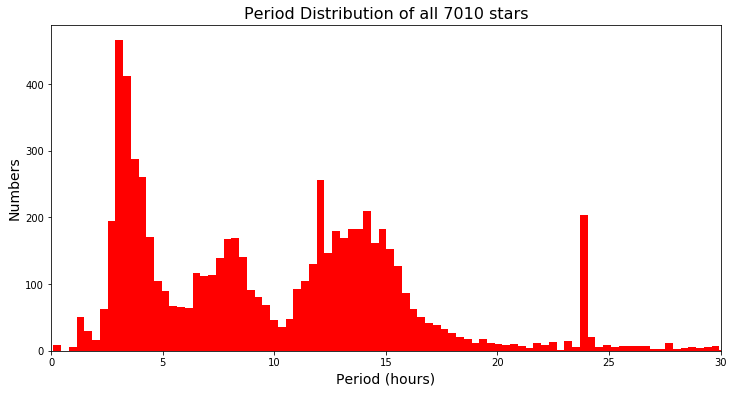

In [38]:
#Computing Periods
period_all = (2 * np.pi / om_best_all)*24

#Plotting the histogram
#ticks = np.arange(1,(len(ids_all)+1)
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(period_all, bins=1000, color='r')
ax.set_title("Period Distribution of all 7010 stars", fontsize=16)
ax.set_xlabel("Period (hours)", fontsize=14)
ax.set_ylabel("Numbers", fontsize=14)
#plt.xticks(ticks)
ax.set_xlim(0,30)

#### Comparison for 100 and  7010 stars

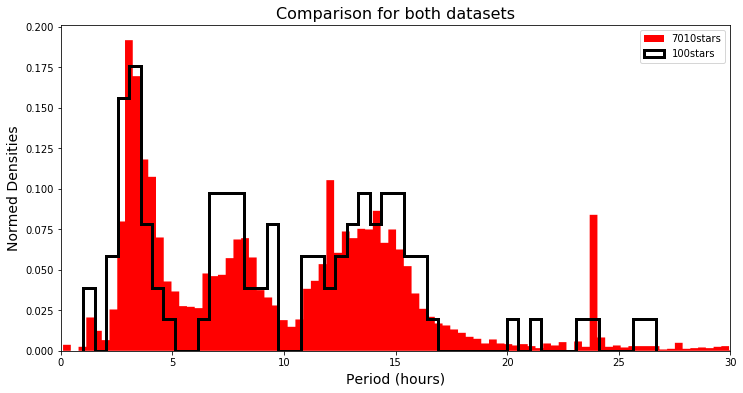

In [50]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist(period_all, bins=1000, color='r', histtype='stepfilled', label='7010stars', density = True)
ax.set_title("Comparison for both datasets", fontsize=16)
ax.set_xlabel("Period (hours)", fontsize=14)
ax.set_ylabel("Normed Densities", fontsize=14)
ax.set_xlim(0,30)
ax.hist(period_main, bins =50, color = 'k',lw=3, histtype='step', label= '100stars', density=True)
ax.legend()

### Conclusion:

* We plot both the histograms for both data sets (100 and 7010 stars). 

* It is interesting to see that the Histograms have peaks for similar peiods. 

* We can see that no. of stars decrease drastically for larger periods. This may also be an observation bias since it is easy to spot stars with smaller periods. 


* We observe 4 groupings.

        Period range 2.5-4.5 hours : Highest peak 
        Period range 7-9 hours
        Period range 12-16 hours   : Broad group
        Period range 16-23 hours   : Very few and gradually decreasing no. of stars
        Period range 24 hours      : A distinct peak

Submitted on: 6th November 2018.